
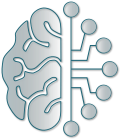

**Start at:** Thursday 11 January 2024, 16:58:54  
**Hostname:** localhost.localdomain (Linux)

<p style="text-align: center"><img width="800px" src="./config/svg/pyPhysChemBanner.svg" style="margin-left:auto; margin-right:auto"/></p>

In [1]:
import os
import sys

cwd0 = './config/'
sys.path.append(cwd0)

import visualID_Eng as vID
from visualID_Eng import color, fg, bg, hl
vID.init(cwd0)
import tools4pyPhysChem as t4pPC

#cancel the "last show-up" behaviour of Jupyter notebooks
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# 1D Convolutional Neural Networks (CNN)

## Introduction

### Convolution in mathematics and physics

<div class="intro">

Convolution is an important operation in signal and image processing. Convolution operates on two signals (in 1D) or two images (in 2D): you can think of one as the “input” signal (or image), and the other (called the **kernel**) as a “filter” on the input image, producing an output image. So convolution takes two images as input and produces a third as output.

Actually, [convolution is a mathematical process](https://en.wikipedia.org/wiki/Convolution) that "blends" two functions. If you take two functions *f* and *g* , there are a number of ways you can combine them. All basic operations can do this (addition, subtraction, multiplication, and division), but there are also special operations that only work with functions and do not work on standard variables or numbers. For example, $f \circ g$ is a composition of the two functions, where you plug  $g(x)$ into $f$. A convolution is another function-related operation, and is often notated with a star (∗) operator, where

$f∗g=h$
 
provides a third function, *h*, that is a blended version of two seemingly unrelated functions *f*  and *g*. it might be better to think of a **convolution as a method to apply a filter to a signal or image**.

In 1D, convolution is defined as the integral of the product of the two functions after one is reflected about the *y*-axis and shifted. As such, it is a particular kind of integral transform:

$$(f*g)(t)=\int_{-\infty}^{\infty}f(t)g(t-\tau)d\tau$$

</div>

#### Simple examples with numpy

##### Basic 1D arrays

<div class="intro">

Let's apply the `convolve` function of numpy to two 1D arrays, `f = [1,2,3,2,1]` and `g = [1,2,2]`, the **kernel**.

We want the resulting array, `h`, to have the same dimension as the largest array. The convolution operation first flips the first array before “sliding” the two across one another. Results in the green boxes correspond to the product of the *f* and *g* vectors term by term, followed by the sum of resulting values - *i.e.* it is the application of $\int_{-\infty}^{\infty}f(t)g(t-\tau)d\tau$:

<img width="60%" src="./ML-Figures/convol1Darrays-same.svg" style="display:block; margin-left:auto; margin-right:auto" id="CNN"/>  
</div>
<br>
<div class="rq">

We want the output to have the same size as the largest array, *i.e.* *f*. This can be obtained with the `same` option of the [`convolve`function of NumPy](https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.convolve.html). In practice, it consists in adding as many zeros as necessary  at the begining and at the end of the `f` array, as illustrated in the figure above. This is called **padding**.
</div>

In [2]:
import numpy as np

f = [1,2,3,2,1]
g = [1,2,2]

h = np.convolve(f,g,'same')
print(h)

[ 4  9 12 11  6]


##### Convolution used to smooth a function

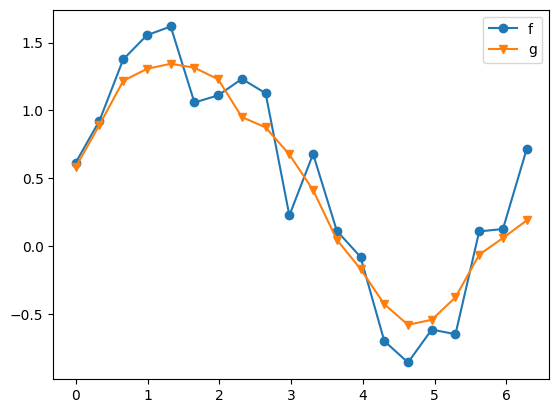

In [3]:
N = 20
x = np.linspace(0,2*np.pi,N)
f = np.sin(x) + np.random.random(N)
g = 1/5*np.array([1,1,1,1,1])
h = np.convolve(f,g,'same')

from matplotlib import pyplot as plt
plt.plot(x,f,marker='o',label='f')
plt.plot(x,h,marker='v',label='g')
plt.legend()
plt.show()

##### Convolution used to calculate the derivative of a function

<div class="intro">
    
The definition of the first [derivative](https://en.wikipedia.org/wiki/Derivative) of a function is:

$$f'(x)=\frac{df}{dx}=\lim_{h\rightarrow0}\frac{f(x)-f(x+h)}{h}$$

A "central" derivative can also be defined:

$$f'(x)=\frac{df}{dx}=\lim_{h\rightarrow0}\frac{f(x+h)-f(x+h)}{2h}$$

It can be approximated as ($h=1$):

$$f'(x)\approx \frac{1}{2}\left( f(x+1)-f(x-1) \right)$$

If you have a discretized function, *i.e.* $[... f(x_{k-2}),f(x_{k-1}),f(x_{k}), f(x_{k+1}), f(x_{k+2}) ...]$, the first derivative can be approximated as

$$f'(x_{k})\approx \frac{1}{2}\left( f(x_{k+1})-f(x_{k-1}) \right)$$

It can be calculated by a convolution, using the **[1,0,-1] kernel** (or **filter**)

</div>
<br>
<div class="app">

Let's consider the sin(*x*) function, which first derivative is cos(*x*)

1. Plot the sin(x) and cos(x) functions, between -2$\pi$ and 2$\pi$
2. Use the convolve operation with the [1,0,-1] kernel to calculate the first derivative of sin(*x*). Plot the resulting array.
</div>

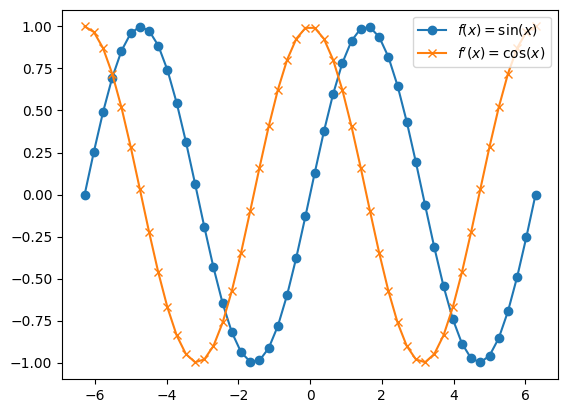

In [22]:
from matplotlib import pyplot as plt
import numpy as np

N = 100
x = np.linspace(-2.*np.pi,2*np.pi)
f = np.sin(x)
fprime = np.cos(x)

plt.plot(x, f,marker='o',label='$f(x) = \sin(x)$')
plt.plot(x, fprime,marker='x',label='$f\'(x) = \cos(x)$')
plt.legend()
plt.show()

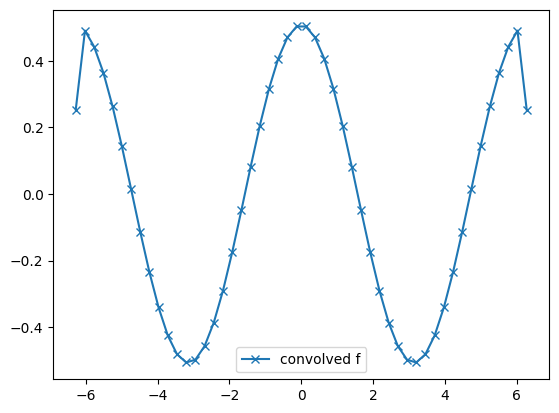

In [24]:
K = [1,0,-1]

h = np.convolve(f,K,'same')
plt.plot(x, h,marker='x',label='convolved f')
plt.legend()
plt.show()

<div class="rq">

There is a boundary effect, due to the `same` option. 

Let's apply the `np.convolve` operation, but with the `valid` and `full` options. **Check the lengths of the resulting functions before plotting!**
</div>

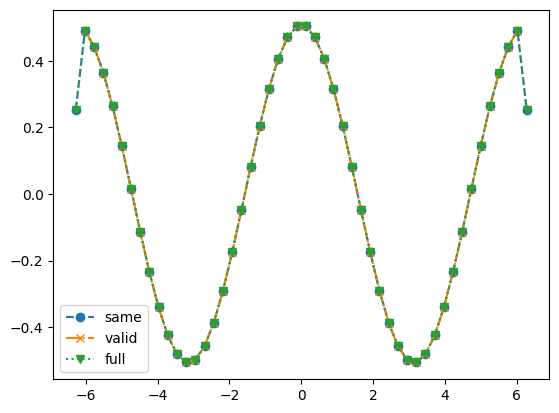

In [45]:
hsame = np.convolve(f,K,'same')
hvalid = np.convolve(f,K,'valid')
hfull = np.convolve(f,K,'full')
plt.plot(x[:], hsame,marker='o',linestyle='--', label='same')
plt.plot(x[1:-1], hvalid,marker='x',linestyle='-.', label='valid')
plt.plot(x[:], hfull[1:-1],marker='v',linestyle=':', label='full')
plt.legend()
plt.show()

##### Application of a pattern to a function

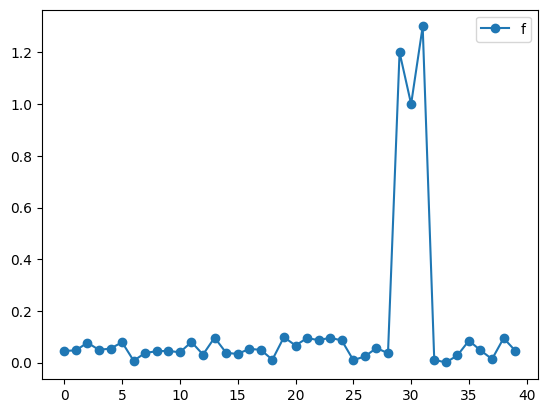

(0.0, 25.0)

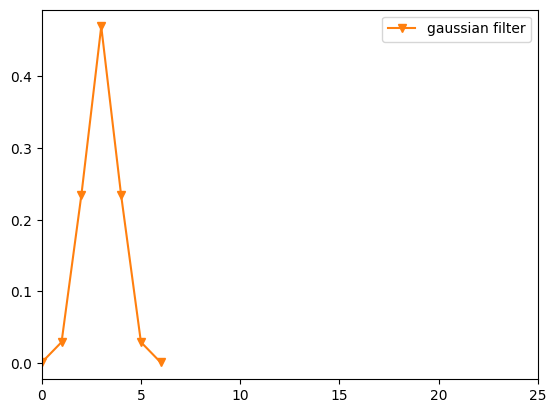

In [5]:
N = 40
f = np.zeros(N) + (np.random.random(N))/10
f[3*N//4-1] = 1.2
f[3*N//4] = 1
f[3*N//4+1] = 1.3
from matplotlib import pyplot as plt
plt.plot(f,marker='o',label='f')
plt.legend()
plt.show()
def gaussian(x, mu, sigma):
    return np.exp(-(x - mu)**2 / (2 * sigma**2.))/(sigma*np.sqrt(2*np.pi))
mu = 3
fwhm = 2
sigma = fwhm/(2*np.sqrt(2*np.log(2)))
x = np.arange(mu-3,mu+4,1)
g = gaussian(x,mu,sigma)
plt.plot(x,g,marker='v',label="gaussian filter",color='C1')
plt.xlim(0,25)
plt.legend()


[0.04679254 0.06573312 0.06127083 0.04459502 0.04679917 0.04850971
 0.05557719 0.04783669 0.03687048 0.05625414 0.07501983 0.07215749
 0.06643243 0.04764029 0.05051264 0.05813865 0.06161054 0.0683251
 0.05462249 0.05247598 0.05610104 0.04118071 0.03612857 0.03673808
 0.03536403 0.04286144 0.03828091 0.07582886 0.33754951 0.84324858
 1.05784178 0.88370648 0.34374108 0.04886947 0.01312599 0.02303228
 0.03083602 0.02139791 0.02906032 0.03912021]


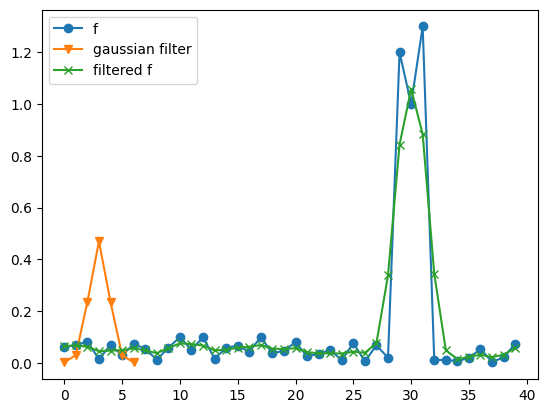

In [5]:
from scipy.ndimage import gaussian_filter1d
filtered_f = gaussian_filter1d(f,sigma)

filtered_f2 = np.convolve(f,g,mode='same')
print(filtered_f2)

plt.plot(f,marker='o',label="f")
plt.plot(g,marker='v',label="gaussian filter")
plt.plot(filtered_f, marker='x', label="filtered f")
plt.legend()

##### Find a pattern by a correlation study: application to radar detection

<div class="intro">

Another application is radar detection. Here's how it works: the radar emits a signal, the waves reach an object (an aircraft, for example) and are reflected back, and the radar receives this reflected signal. The time taken for the waves to make the round trip is used to calculate the distance to the object.

<img width="15%" src="./ML-Figures/RadarAntenna-DallE.png" style="display:block; margin-left:auto; margin-right:auto" id="radar"/>  


In practice, it's more complicated: the transmitted signal is well known, but the received signal, or echo, is made up of the reflected wave superimposed with random noise from the environment (clouds, birds, etc.).

The application of *correlation* is a good method to find the radar signal in the echo. Correlation is a similar operation to except that the kernel is not inverted. 

Let's first simulate the pulsed radar signal, *i.e.* the wave emitted by the radar. It will be the **kernel** 

</div>

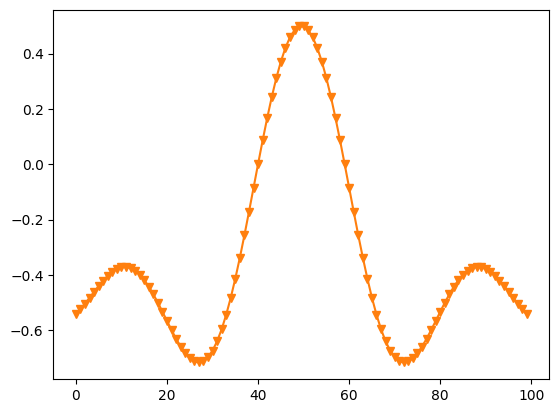

In [6]:
import numpy as np
import matplotlib.pyplot as plt

def correlation(f,g):
    import numpy as np
    gg = np.flip(g)
    h = np.convolve(f,gg,'same')
    return h

# Generating a signal emitted by a radar
Nradar = 100
Xradar = np.linspace(-3.14,3.14,Nradar)
Yradar = np.sinc(Xradar) - 0.5
plt.plot(Yradar,color='C1',marker='v')
plt.show()



<div class="intro">

Let's now simulate a noisy signal, in order to generate the echo received by the radar.
</div>

<Figure size 1000x300 with 0 Axes>

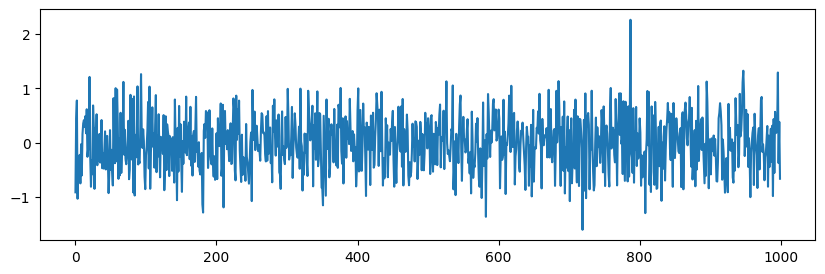

In [7]:
a, b, Nin = 0, 1000, 1000
Xin = np.linspace(a, b, Nin)
Yrandom = np.random.normal(0,1,Nin)/2
plt.figure(figsize=(10,3))
plt.plot(Yrandom)
plt.show()

<div class="intro">

Add now the pulsed radar single signal to the noisy signal, after a delay of 350 time steps. For that, we will use the [`pad` function of NumPy](https://numpy.org/doc/stable/reference/generated/numpy.pad.html).
</div>

<Figure size 1000x300 with 0 Axes>

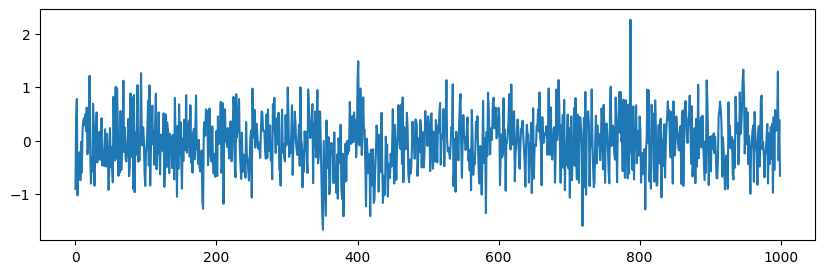

In [8]:
delay = 350
Yin = Yrandom + np.pad(Yradar,(delay,Nin-Nradar-delay),'constant', constant_values=(0, 0))
plt.figure(figsize=(10,3))
plt.plot(Yin,color='C0')
plt.show()

<div class="rqT" title="Compare the two signals">

At first sight, the difference between the two signals is not immediately noticeable. The radar echo, between t=350 and t=450, is well hidden in the noise..
</div>
<br>
<div class="intro">

Let's now filter the received signal by searching a correlation with the radar echo.
</div>

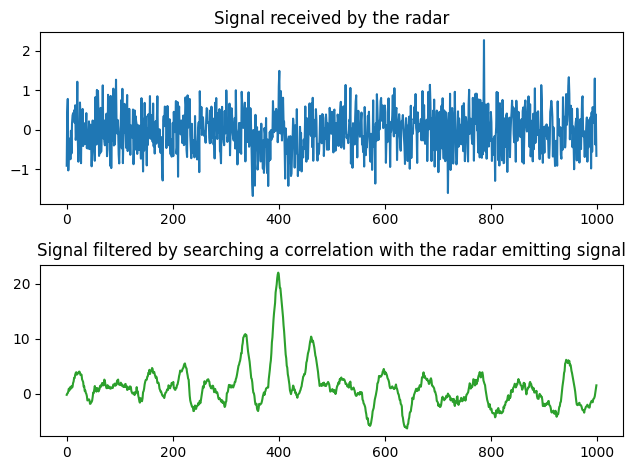

In [9]:
def affichage_correlation(f,g):
    gg = np.flip(g)
    h = np.convolve(f,gg,'same')

    ax = plt.subplot(2,1,1)
    ax.set_title("Signal received by the radar")
    plt.plot(f,color='C0')

    ax = plt.subplot(2,1,2)
    ax.set_title("Signal filtered by searching a correlation with the radar emitting signal")
    plt.plot(h,color='C2')

    plt.subplots_adjust(top=0.9, bottom=0.1, left=0.1, right=0.95, hspace=1.0,wspace=0.5)
    plt.tight_layout()
    plt.show()
    return


affichage_correlation(Yin,Yradar)

<div class="rq">

The observed peak corresponds to the signal returned by the aircraft. In the example, this signal is detected at position t=400. This makes possible the calculation of the distance from the radar to the aircraft
</div>

### 1D convolutional neural networks

<div class="intro">

**1D Convolutional Neural Networks** (**CNNs**) have recently become the state-of-the-art technique for crucial signal processing applications such as patient-specific ECG classification, structural health monitoring, anomaly detection in power electronics circuitry and motor-fault detection. Here is a general scheme:

<img width="40%" src="./DS4B-Slides/pngs/ZooNN/CNNwithLegend.svg" style="display:block; margin-left:auto; margin-right:auto" id="CNN"/>  

Convolutional layers are generally followed by "classical" dense layers.

</div>
<br>
<div class="rq">

As you can see in the above scheme, the connectivity is not the same in the CNN part as in dense layers. Let's consider a 1D convolution window, *i.e.* the **kernel**, of size 3:

<img width="17%" src="./ML-Figures/CNNschematic.svg" style="display:block; margin-left:auto; margin-right:auto" id="CNNwithKernel"/>  

The content of a convolutional neuron is simply calculated as 

$$c=\sum_{i=m}^{m+K-1}w_{i}x_{i}$$

where $i$ runs over the kernel, of size $K$.

</div>

## Application to the classification of functions

### Data

#### Read the data

In [9]:
import pandas as pd
import numpy as np

import os

pathway = "./ML-data/"
csv1DF = pathway+"Conv1D_functions.csv"
csv1DL = pathway+"Conv1D_labels.csv"

if os.path.exists(csv1DF) and os.path.exists(csv1DL):
    dfF=pd.read_csv(csv1DF, sep="\t", index_col = 0) 
    dfY=pd.read_csv(csv1DL, sep="\t", index_col = 0) 
    print(f"dfF. Structure (shape) :{dfF.shape}")
    print(f"dfY. Structure (shape) :{dfY.shape}")
    display(dfF)
    display(dfY)
else:
    print(f'{csv1DF} and/or {csv1DL} were not found')
    print('Create first these files, by running the codes of the appendix of the present notepook')

dfF. Structure (shape) :(800, 8001)
dfY. Structure (shape) :(8000, 2)


x       F_00000       F_00001       F_00002      F_00003  \
0     0.05    550.171021 -1.965192e+07  6.948856e+05   -63.492923   
1     0.10   -775.339409 -5.478954e+07 -8.278948e+05   -48.268840   
2     0.15   -183.660240  2.249674e+07  1.349384e+06  -255.083047   
3     0.20   -995.103193  9.610952e+06  8.396922e+05   -10.979958   
4     0.25     70.999700  3.133841e+07  1.705852e+06   189.230452   
..     ...           ...           ...           ...          ...   
795  39.80  15965.289531  1.231645e+09 -2.948668e+07 -3339.660066   
796  39.85  17239.595380  1.293394e+09 -2.919162e+07 -3462.296310   
797  39.90  16752.013466  1.322353e+09 -2.846552e+07 -3364.138052   
798  39.95  16658.286195  1.232417e+09 -2.955576e+07 -3705.544332   
799  40.00  17665.182896  1.305561e+09 -2.876869e+07 -3390.433717   

          F_00004      F_00005     F_00006       F_00007     F_00008  ...  \
0       31.925608    41.350936  -37.632808 -2.112322e+06  -28.135311  ...   
1     -214.751392   -81.001649  -23.551657  1.068119e+06    9.740560  ...   
2      447.490853   144.554772    6.847413  1.015053e+06    2.674572  ...   
3     -222.754310   -53.994363   40.203761 -1.484871e+06   -5.149574  ...   
4       92.853192   120.325821    8.017557 -6.386775e+05  -29.006964  ...   
..            ...          ...         ...           ...         ...  ...   
795 -18368.133220 -3053.432500  647.805447  4.434217e+07 -747.049221  ...   
796 -19796.883043 -3344.899587  666.432786  4.533921e+07 -726.195783  ...   
797 -20285.820447 -3255.965751  667.252420  4.524681e+07 -750.452061  ...   
798 -20029.835450 -3254.584948  648.298438  4.424379e+07 -725.855390  ...   
799 -19887.967872 -3427.168740  670.294588  4.735262e+07 -723.183811  ...   

         F_07990       F_07991       F_07992    F_07993       F_07994  \
0    2733.201966  44130.099834 -50101.768316 -63.303913  62355.179910   
1    2989.917225  46779.421220 -27522.239646 -59.631445  64317.100665   
2    2756.097600  50773.801418 -30188.122478 -62.750719  55143.366743   
3    3426.924111  41861.674220 -30107.011901 -63.611709  76891.648639   
4    2857.655413  39705.458703 -47417.019526 -60.301202  73896.914246   
..           ...           ...           ...        ...           ...   
795   104.302092   -786.935086     15.750623  -0.481179   2960.525053   
796   425.598157   3190.372208 -13247.304826   0.408793 -20351.708783   
797   388.748022  -9312.142262   1873.632827  -2.242307  30822.121637   
798  -293.158704 -14942.915624   5762.327582  -7.602892  17585.704270   
799   186.464315  -7310.925940   4161.574736   0.521216 -12452.831947   

           F_07995    F_07996       F_07997       F_07998       F_07999  
0   -198518.668101  64.229074 -1.832973e+07  4.539894e+08 -1.076903e+06  
1   -156712.313094  60.791944  2.235318e+07 -7.840389e+07 -1.604348e+06  
2   -707006.118657  60.178147 -1.024654e+07 -7.201940e+08 -6.781913e+05  
3   -351263.953307  58.808180  1.155422e+07  3.744341e+08 -1.180772e+06  
4   -710812.097512  57.631936 -3.698943e+07 -5.535431e+07 -1.284310e+06  
..             ...        ...           ...           ...           ...  
795 -245145.436893   2.499886  1.633933e+07 -1.282576e+08 -6.601352e+05  
796  236178.768823  -0.051868 -2.610857e+07  7.622598e+08 -1.881075e+05  
797   68459.240070  -4.462445 -1.451185e+07  9.716904e+08 -3.891660e+05  
798   -6088.197165  -1.103443  1.765349e+07 -1.593405e+09 -8.316042e+05  
799   21909.600604  -3.702512 -1.051551e+07 -4.809697e+08 -2.878733e+05  

[800 rows x 8001 columns]

F  order
F_00000     P      2
F_00001     P      5
F_00002     P      4
F_00003     P      2
F_00004     P      2
...       ...    ...
F_07995  PGau      3
F_07996  PGau      0
F_07997  PGau      4
F_07998  PGau      5
F_07999  PGau      3

[8000 rows x 2 columns]

#### Standardization of the data and one-hot-encoding of the polynomial type

In [11]:
from sklearn import preprocessing
scaler = preprocessing.StandardScaler()
scaler.fit(dfF.iloc[:,1:]) #do not scale x column
FS = scaler.transform(dfF.iloc[:,1:].values)
dfFS = pd.DataFrame(FS, columns=dfF.columns[1:], index=dfF.index)
dfFx = dfF.iloc[:, [0]].copy()
dfFS = pd.concat([dfFx,dfFS],axis=1)
display(dfFS.describe().style.format("{0:.2f}").set_caption("Training set before normalisation"))
dfFS = dfFS.T

StandardScaler()

/home/romuald/Python3/ML/lib64/python3.11/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [12]:
# display(dfFS)
nlines = dfFS.shape[0]
ncols = dfFS.shape[1]
dfFS["F"]=dfY["F"]
dfFS["order"]=dfY["order"]
# dfFS and dfY have the same index => 1st "F" and "order" values are NaN becasue row 0 = "x", which does not exist in dfY
# actually, the "x" row is a polynomial with order 1
dfFS.loc["x","F"] = "P"
dfFS.loc["x","order"] = 1.0
display(dfFS)

0         1         2         3         4         5         6  \
x        0.050000  0.100000  0.150000  0.200000  0.250000  0.300000  0.350000   
F_00000  1.761384  1.775866  1.790753  1.849794  1.641006  1.682129  1.664075   
F_00001  0.697173  0.637436  0.330138  0.650759  0.590853  0.647966  0.756107   
F_00002 -1.041707 -1.142354 -1.063887 -1.205081 -0.962049 -0.938834 -1.269228   
F_00003 -0.699789 -0.886590 -0.858548 -0.583108 -0.689339 -0.942555 -0.733533   
...           ...       ...       ...       ...       ...       ...       ...   
F_07995 -0.806273 -0.594776 -0.786016 -0.712770 -0.651018 -0.703416 -0.635655   
F_07996  0.699782  0.712340  0.558872  0.633772  0.538580  0.426398  0.459400   
F_07997  0.772854  0.639515  0.663836  0.579793  0.587367  0.845620  0.852357   
F_07998 -0.427489 -0.017829  0.002524 -0.255817 -0.178918 -0.076514 -0.200988   
F_07999  0.933715  0.775607  0.605353  0.997755  0.748271  0.569557  0.821146   

                7         8         9  ...        792        793        794  \
x        0.400000  0.450000  0.500000  ...  39.650000  39.700000  39.750000   
F_00000  1.803342  1.565739  1.542242  ...  -1.571221  -1.806159  -1.623452   
F_00001  0.647911  0.466625  0.825815  ...  -2.975211  -3.201527  -3.088829   
F_00002 -0.962457 -1.276113 -1.012513  ...   2.146269   2.013928   1.984116   
F_00003 -0.625854 -0.984567 -0.962387  ...   2.964174   3.009947   2.560235   
...           ...       ...       ...  ...        ...        ...        ...   
F_07995 -0.806457 -0.552716 -0.710056  ...  -0.903170  -0.889042  -0.636438   
F_07996  0.429799  0.557557  0.602988  ...   1.207084   1.015804   1.075898   
F_07997  0.881838  0.725931  0.853384  ...   0.580182   0.830065   0.698134   
F_07998 -0.071651 -0.042285 -0.183424  ...  -1.250418  -1.264585  -1.263686   
F_07999  0.609651  0.639306  0.665911  ...   0.750357   0.665059   0.581883   

               795        796        797        798        799     F  order  
x        39.800000  39.850000  39.900000  39.950000  40.000000     P    1.0  
F_00000  -1.797501  -1.688691  -1.824141  -1.654487  -1.501866     P    1.0  
F_00001  -3.126125  -3.104707  -3.220026  -3.119997  -3.276827     P    4.0  
F_00002   2.259123   2.334723   2.344075   2.237501   2.307668     P    2.0  
F_00003   2.927006   2.784196   2.708216   3.085886   2.841798     P    4.0  
...            ...        ...        ...        ...        ...   ...    ...  
F_07995  -0.982094  -0.836046  -0.857531  -1.035272  -0.837403  PGau    3.0  
F_07996   1.155813   1.017744   1.016232   1.114185   1.121600  PGau    2.0  
F_07997   0.798272   0.822860   0.715987   0.770524   0.830103  PGau    5.0  
F_07998  -1.321430  -1.239309  -1.303383  -1.167868  -1.266192  PGau    1.0  
F_07999   0.811344   0.635375   0.690696   0.648213   0.840800  PGau    5.0  

[8001 rows x 802 columns]

In [13]:
uv = dfFS["F"].unique()
print(f"{len(uv):2} catégories uniques : {uv}") 
mapc2i = {}
for x in range(len(uv)):
    mapc2i[uv[x]] = x
print(f"Correspondance entre chaque catégorie unique et un entier : {mapc2i}")
F_ohe = t4pPC.y2c(mapc2i,dfFS["F"])
dfohe = pd.DataFrame(F_ohe,columns=uv,index=dfFS.index)
dfFSohe = pd.concat([dfFS,dfohe],axis=1)
col = dfFSohe.pop('order')
dfFSohe.insert(dfFSohe.shape[1], col.name, col)
display(dfFSohe)

del dfohe,dfFS,mapc2i

 4 catégories uniques : ['P' 'PSin' 'PSin3' 'PGau']
Correspondance entre chaque catégorie unique et un entier : {'P': 0, 'PSin': 1, 'PSin3': 2, 'PGau': 3}


2023-10-25 19:47:12.050361: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-10-25 19:47:12.073288: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-10-25 19:47:12.190105: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-10-25 19:47:12.191107: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-10-25 19:47:13.098089: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not fin

0         1         2         3         4         5         6  \
x        0.050000  0.100000  0.150000  0.200000  0.250000  0.300000  0.350000   
F_00000  1.761384  1.775866  1.790753  1.849794  1.641006  1.682129  1.664075   
F_00001  0.697173  0.637436  0.330138  0.650759  0.590853  0.647966  0.756107   
F_00002 -1.041707 -1.142354 -1.063887 -1.205081 -0.962049 -0.938834 -1.269228   
F_00003 -0.699789 -0.886590 -0.858548 -0.583108 -0.689339 -0.942555 -0.733533   
...           ...       ...       ...       ...       ...       ...       ...   
F_07995 -0.806273 -0.594776 -0.786016 -0.712770 -0.651018 -0.703416 -0.635655   
F_07996  0.699782  0.712340  0.558872  0.633772  0.538580  0.426398  0.459400   
F_07997  0.772854  0.639515  0.663836  0.579793  0.587367  0.845620  0.852357   
F_07998 -0.427489 -0.017829  0.002524 -0.255817 -0.178918 -0.076514 -0.200988   
F_07999  0.933715  0.775607  0.605353  0.997755  0.748271  0.569557  0.821146   

                7         8         9  ...        796        797        798  \
x        0.400000  0.450000  0.500000  ...  39.850000  39.900000  39.950000   
F_00000  1.803342  1.565739  1.542242  ...  -1.688691  -1.824141  -1.654487   
F_00001  0.647911  0.466625  0.825815  ...  -3.104707  -3.220026  -3.119997   
F_00002 -0.962457 -1.276113 -1.012513  ...   2.334723   2.344075   2.237501   
F_00003 -0.625854 -0.984567 -0.962387  ...   2.784196   2.708216   3.085886   
...           ...       ...       ...  ...        ...        ...        ...   
F_07995 -0.806457 -0.552716 -0.710056  ...  -0.836046  -0.857531  -1.035272   
F_07996  0.429799  0.557557  0.602988  ...   1.017744   1.016232   1.114185   
F_07997  0.881838  0.725931  0.853384  ...   0.822860   0.715987   0.770524   
F_07998 -0.071651 -0.042285 -0.183424  ...  -1.239309  -1.303383  -1.167868   
F_07999  0.609651  0.639306  0.665911  ...   0.635375   0.690696   0.648213   

               799     F    P  PSin  PSin3  PGau  order  
x        40.000000     P  1.0   0.0    0.0   0.0    1.0  
F_00000  -1.501866     P  1.0   0.0    0.0   0.0    1.0  
F_00001  -3.276827     P  1.0   0.0    0.0   0.0    4.0  
F_00002   2.307668     P  1.0   0.0    0.0   0.0    2.0  
F_00003   2.841798     P  1.0   0.0    0.0   0.0    4.0  
...            ...   ...  ...   ...    ...   ...    ...  
F_07995  -0.837403  PGau  0.0   0.0    0.0   1.0    3.0  
F_07996   1.121600  PGau  0.0   0.0    0.0   1.0    2.0  
F_07997   0.830103  PGau  0.0   0.0    0.0   1.0    5.0  
F_07998  -1.266192  PGau  0.0   0.0    0.0   1.0    1.0  
F_07999   0.840800  PGau  0.0   0.0    0.0   1.0    5.0  

[8001 rows x 806 columns]

#### Construction of the training and test sets

In [14]:
data_train = dfFSohe.sample(frac=0.8, axis='index')
data_test  = dfFSohe.drop(data_train.index) 
catY = np.concatenate((["F"],uv,["order"]))
x_train = data_train.drop(catY,axis=1)
x_test = data_test.drop(catY,axis=1)
# for function classification
y_train = data_train[uv]
y_test = data_test[uv]
# for the identification of the order of the polynomial
yOrder_train = data_train["order"]
yOrder_test = data_test["order"]
#
t4pPC.centerTitle("Training set")
display(x_train[0:5])
display(y_train[0:5])
display(yOrder_train[0:5])
t4pPC.centerTitle("Test set")
display(x_test[0:5])
display(y_test[0:5])
display(yOrder_test[0:5])

0         1         2         3         4         5         6    \
F_02234  0.111032  0.120327  0.003948  0.282595  0.209763  0.315148  0.517561   
F_00502 -1.114962 -1.086098 -1.170001 -1.041657 -0.904169 -1.212831 -0.979005   
F_05749 -0.132854 -0.176351 -0.013670  0.218207 -0.396962  0.015795  0.140114   
F_05878  0.213562 -0.062061 -0.132682  0.017904  0.236402  0.301034  0.459787   
F_06934  0.724595  0.706374  0.652884  0.486202  0.902445  0.643479  0.827031   

              7         8         9    ...       790       791       792  \
F_02234  0.499171  0.557835  0.598267  ...  1.195742  1.180445  1.203052   
F_00502 -1.162786 -1.272127 -0.980442  ...  2.050409  2.205406  2.030462   
F_05749  0.192927 -0.225841 -0.358320  ...  4.516258  4.156141  4.016769   
F_05878  0.200232 -0.091387 -0.024568  ... -3.594769 -3.812755 -3.625103   
F_06934  0.696167  0.617408  0.830471  ...  1.005294  0.836209  0.987431   

              793       794       795       796       797       798       799  
F_02234  1.117262  1.249331  1.122564  1.123921  1.135192  1.043178  1.186459  
F_00502  2.079314  2.179963  2.238031  2.094199  2.147827  2.158932  2.360238  
F_05749  3.910183  3.655670  3.462476  2.790274  2.823876  2.297472  2.133220  
F_05878 -2.951125 -2.853376 -2.501387 -3.082610 -2.012548 -2.010663 -1.703971  
F_06934  0.989889  0.889217  0.998810  0.897177  1.000551  0.997713  0.775420  

[5 rows x 800 columns]

P  PSin  PSin3  PGau
F_02234  0.0   1.0    0.0   0.0
F_00502  1.0   0.0    0.0   0.0
F_05749  0.0   0.0    1.0   0.0
F_05878  0.0   0.0    1.0   0.0
F_06934  0.0   0.0    0.0   1.0

F_02234    0.0
F_00502    2.0
F_05749    5.0
F_05878    3.0
F_06934    3.0
Name: order, dtype: float64

0         1         2         3         4         5         6    \
F_00004  0.803931  0.682927  0.737710  0.843185  0.694262  0.720824  0.664579   
F_00009 -0.808107 -0.921955 -0.746119 -0.724059 -1.101065 -1.009303 -0.785505   
F_00010 -0.768712 -0.829901 -0.604281 -0.849431 -0.771142 -0.585502 -0.712045   
F_00017  0.783507  1.087347  0.876308  1.019723  0.849124  0.957791  0.979317   
F_00024  1.110845  1.058052  1.097192  1.088834  1.277181  1.020922  1.213280   

              7         8         9    ...       790       791       792  \
F_00004  0.790946  0.693400  0.648969  ... -2.841989 -2.896018 -2.806525   
F_00009 -0.941509 -0.641304 -0.822841  ...  2.287821  2.364990  2.369353   
F_00010 -0.859687 -0.902207 -0.822871  ...  2.601040  2.765452  2.650725   
F_00017  0.724892  0.801319  0.845066  ... -2.720326 -2.724802 -2.402472   
F_00024  1.098312  1.199781  1.128969  ... -2.127431 -2.137089 -2.190258   

              793       794       795       796       797       798       799  
F_00004 -2.965195 -2.877870 -2.978149 -3.030236 -2.966454 -2.841454 -3.150667  
F_00009  2.491882  2.620916  2.697901  2.456595  2.641047  2.476243  2.732573  
F_00010  2.679653  2.945328  3.034580  2.768113  2.805565  2.957685  2.874521  
F_00017 -2.494354 -2.436259 -2.668250 -2.715670 -2.431119 -2.633984 -2.496486  
F_00024 -2.241876 -2.099245 -2.092755 -2.268289 -2.256692 -2.331446 -2.259997  

[5 rows x 800 columns]

P  PSin  PSin3  PGau
F_00004  1.0   0.0    0.0   0.0
F_00009  1.0   0.0    0.0   0.0
F_00010  1.0   0.0    0.0   0.0
F_00017  1.0   0.0    0.0   0.0
F_00024  1.0   0.0    0.0   0.0

F_00004    4.0
F_00009    3.0
F_00010    4.0
F_00017    3.0
F_00024    2.0
Name: order, dtype: float64

### Definition of useful functions

In [115]:
def plotEpochs(history,metrics):
    import matplotlib.pyplot as plt
    import pandas as pd
    import numpy as np
    # c'est pratique d'utiliser un dataframe et les fonctions de tracé associées
    df=pd.DataFrame(data=history.history)

    nEpoch = df.shape[0]
    print(nEpoch)
    
    plt.rcParams["figure.figsize"] = (8,4)
    # on va d'abord tracer les courbes de la fonction qui a été minimisée au cours de l'apprentissage
    figLOSS=df.plot(y=["loss","val_loss"],linestyle='-', marker='o',fontsize=14)
    figLOSS.set_xlabel('epoch',fontdict={'fontsize':16})
    figLOSS.set_ylabel('loss',fontdict={'fontsize':16})
    yMin = np.min(df[["loss","val_loss"]].iloc[nEpoch//3:nEpoch,:].to_numpy())
    yMax = np.max(df[["loss","val_loss"]].iloc[nEpoch//3:nEpoch,:].to_numpy())
    yMin = round(yMin-0.05,1)
    yMax = round(yMax+0.05,1)
    print(yMin,yMax)
    figLOSS.set_ylim([yMin,yMax])
    figLOSS.legend(loc='upper right', shadow=True, fontsize='x-large')
    plt.show()

    for i in range(len(metrics)):
        ErrTraining = metrics[i]
        ErrVal = "val_" + ErrTraining
        figACC=df.plot(y=[ErrTraining,ErrVal],linestyle='-', marker='o',fontsize=14)
        figACC.set_xlabel('epoch',fontdict={'fontsize':16})
        figACC.set_ylabel(ErrTraining,fontdict={'fontsize':16})
        yMin = np.min(df[[ErrTraining,ErrVal]].iloc[nEpoch//3:nEpoch,:].to_numpy())
        yMax = np.max(df[[ErrTraining,ErrVal]].iloc[nEpoch//3:nEpoch,:].to_numpy())
        yMin = round(yMin-0.05,1)
        yMax = round(yMax+0.05,1)
        print(yMin,yMax)
        figACC.set_ylim([yMin,yMax])
        figACC.legend(loc='lower right', shadow=True, fontsize='x-large')
        plt.show()

def printAcc(model, x_train, y_train, x_test, y_test):
    evalANN_on_TrainSet = model.evaluate(x_train, y_train, verbose=0)
    print(f"{color.GREEN}x_train / loss      : {evalANN_on_TrainSet[0]:5.4f}{color.OFF}")
    print(f"{color.GREEN}x_train / accuracy  : {evalANN_on_TrainSet[1]:5.4f}{color.OFF}")
    print(f"{color.GREEN}x_train / mae       : {evalANN_on_TrainSet[2]:5.4f}{color.OFF}")
    print()
    evalANN_on_TestSet = model.evaluate(x_test, y_test, verbose=0)
    print(f"{color.BLUE} x_test / loss      : {evalANN_on_TestSet[0]:5.4f}{color.OFF}")
    print(f"{color.BLUE} x_test / accuracy  : {evalANN_on_TestSet[1]:5.4f}{color.OFF}")
    print(f"{color.BLUE} x_test / mae       : {evalANN_on_TestSet[2]:5.4f}{color.OFF}")

def plotConfusionMatrix(y_trainC, y_trainC_hat, y_testC, y_testC_hat, uv):
    from sklearn.metrics import ConfusionMatrixDisplay
    from sklearn.metrics import confusion_matrix
    import matplotlib.pyplot as plt
    import matplotlib.gridspec as gridspec
    import seaborn as sns
    from sklearn.metrics import accuracy_score
    from sklearn.metrics import mean_absolute_error
    from sklearn.metrics import mean_squared_error
    
    cm_labels = uv
    cm_tr = confusion_matrix(np.argmax(y_trainC.to_numpy(),axis=1), np.argmax(y_trainC_hat,axis=1))
    cm_tt = confusion_matrix(np.argmax(y_testC.to_numpy(),axis=1), np.argmax(y_testC_hat,axis=1))

    fig=plt.figure()
    gs = gridspec.GridSpec(nrows=1, ncols=2, width_ratios=[1, 1])
    
    ax00 = fig.add_subplot(gs[0, 0], title="Training set. Confusion Matrix")
    sns.heatmap(pd.DataFrame(cm_tr, columns=cm_labels, index=cm_labels), ax=ax00, cmap=plt.cm.Blues, annot = True)
    ax00.set_xlabel("predicted", fontsize = 20)
    ax00.set_ylabel("real", fontsize = 20)
    
    ax01=fig.add_subplot(gs[0, 1], title="Test set. Confusion Matrix")
    sns.heatmap(pd.DataFrame(cm_tt, columns=cm_labels, index=cm_labels), ax=ax01, cmap=plt.cm.Blues, annot = True)
    ax01.set_xlabel("predicted", fontsize = 20)
    ax01.set_ylabel("real", fontsize = 20)
    plt.show()

    atr = accuracy_score(np.argmax(y_trainC.to_numpy(),axis=1),np.argmax(y_trainC_hat,axis=1))
    att = accuracy_score(np.argmax(y_testC.to_numpy(),axis=1),np.argmax(y_testC_hat,axis=1))
    maetr = mean_absolute_error(np.argmax(y_trainC.to_numpy(),axis=1),np.argmax(y_trainC_hat,axis=1))
    maett = mean_absolute_error(np.argmax(y_testC.to_numpy(),axis=1),np.argmax(y_testC_hat,axis=1))
    msetr = mean_squared_error(np.argmax(y_trainC.to_numpy(),axis=1),np.argmax(y_trainC_hat,axis=1))
    msett = mean_squared_error(np.argmax(y_testC.to_numpy(),axis=1),np.argmax(y_testC_hat,axis=1))
    print(f"{hl.BOLD}{fg.BLUE}                Accurracy       MAE         MSE")
    print(f"{hl.BOLD}{fg.PURPLE} Training set.      {atr:.2f}        {maetr:.2f}        {msetr:.2f}")
    print(f"{hl.BOLD}{fg.GREEN}     Test set.      {att:.2f}        {maett:.2f}        {msett:.2f}")
    return



### First model: supervised learning of the polynomial type = classification with dense layers only

#### Definition and compilation of the model

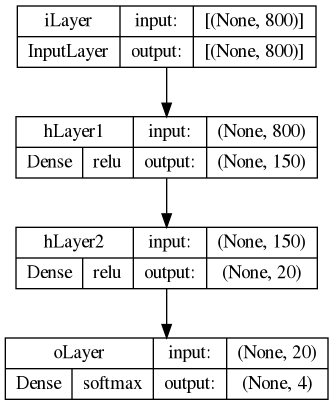

In [27]:
import tensorflow as tf
from tensorflow import keras

nFeatures = x_train.shape[1]
modelCD = keras.models.Sequential() #modelCD as classification with dense layers
modelCD.add(keras.layers.Input(nFeatures, name='iLayer'))
modelCD.add(keras.layers.Dense(150, activation='relu', name='hLayer1'))
modelCD.add(keras.layers.Dense( 20, activation='relu', name='hLayer2'))
modelCD.add(keras.layers.Dense(len(uv), activation='softmax', name='oLayer'))

metrics = ['accuracy','mae']

modelCD.compile(optimizer = 'adam',
              loss      = 'categorical_crossentropy',
              metrics   = metrics )

from tensorflow.keras.utils import plot_model
plot_model(modelCD, show_shapes=True, show_layer_names=True, show_layer_activations=True)


#### Training

In [43]:
vID.chrono_start()
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=30)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2,
                              patience=10, min_lr=0.001)
modelCD.summary()
vID.chrono_start()
historyCD = modelCD.fit(x_train,
                      y_train,
                      epochs          = 700,
                      batch_size      = 10,
                      verbose         = 1,
                      validation_data = (x_test, y_test),
                      callbacks=[es,reduce_lr])
vID.chrono_show()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 hLayer1 (Dense)             (None, 150)               120150    
                                                                 
 hLayer2 (Dense)             (None, 20)                3020      
                                                                 
 oLayer (Dense)              (None, 4)                 84        
                                                                 
Total params: 123254 (481.46 KB)
Trainable params: 123254 (481.46 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/700
641/641 [==============================] - 3s 3ms/step - loss: 0.0310 - accuracy: 0.9909 - mae: 0.0095 - val_loss: 7.8136e-04 - val_accuracy: 1.0000 - val_mae: 3.8959e-04 - lr: 0.0010
Epoch 2/700
641/641 [==============================] - 2s 3ms/step - loss: 2.1840e

KeyboardInterrupt: 

#### Evaluation of the accuracy

97
-0.0 0.2


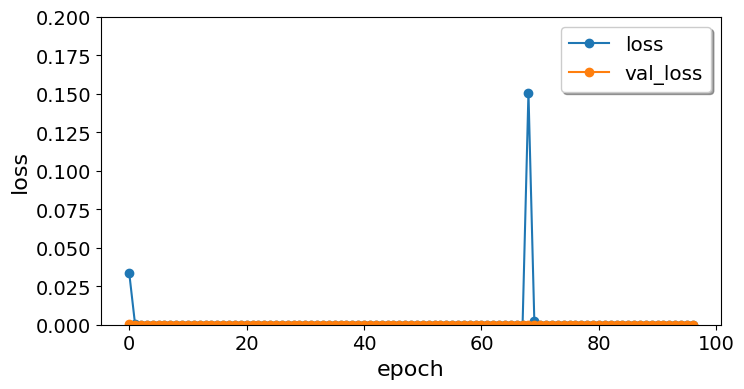

0.9 1.0


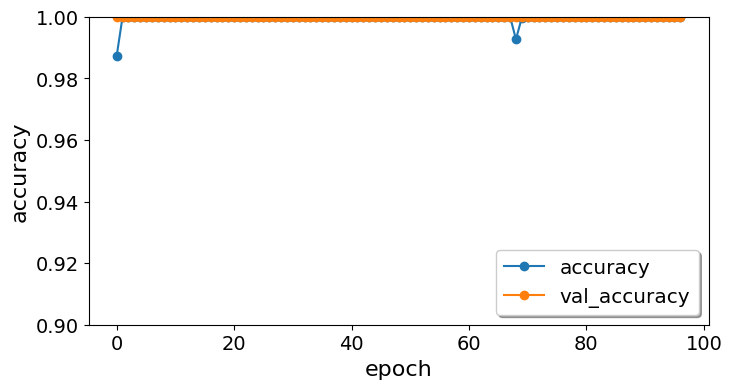

-0.0 0.1


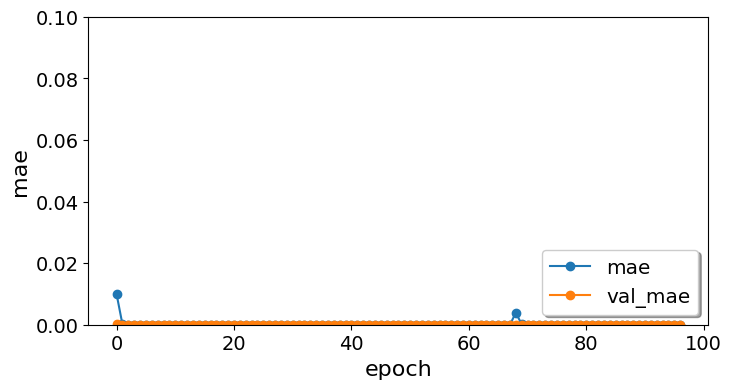

In [116]:
plotEpochs(historyCD,metrics)

In [19]:
printAcc(modelCD, x_train, y_train, x_test, y_test)

x_train / loss      : 0.0000
x_train / accuracy  : 1.0000
x_train / mae       : 0.0000

 x_test / loss      : 0.0000
 x_test / accuracy  : 1.0000
 x_test / mae       : 0.0000


50/50 [==============================] - 0s 2ms/step


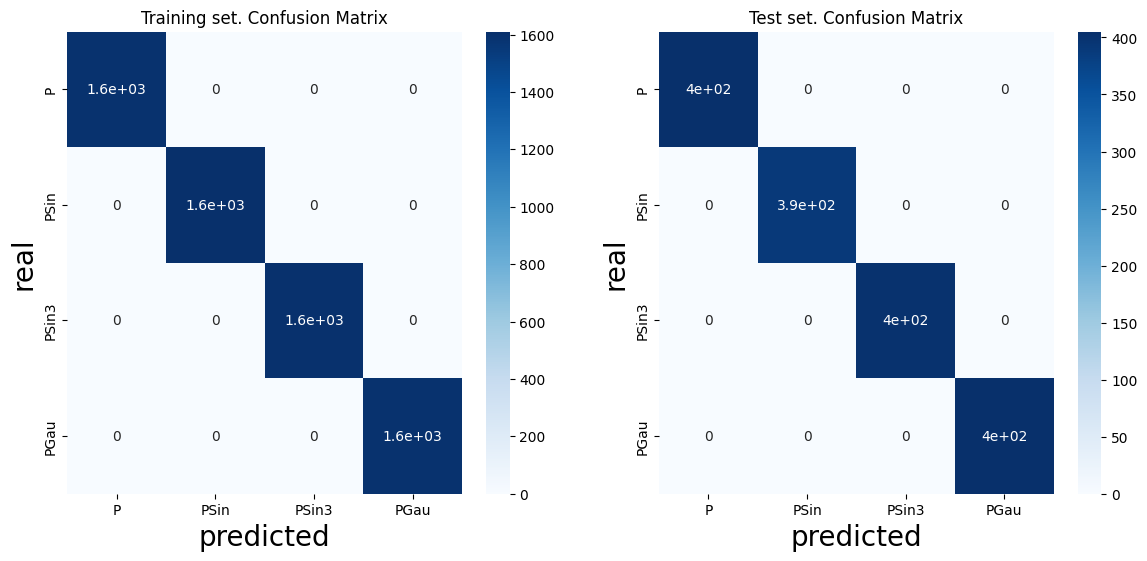

                Accurracy       MAE         MSE
 Training set.      1.00        0.00        0.00
     Test set.      1.00        0.00        0.00


In [20]:
y_train_hat = modelCD.predict(x_train)
y_test_hat = modelCD.predict(x_test)    

plotConfusionMatrix(y_train, y_train_hat, y_test, y_test_hat, uv)

### Second model: supervised learning of the polynomial type = classification with 1D convolutional / pooling / dense layers

#### Definition of the model

<div class="introT" title="conv1D input and output">

- **Input** = 3D tensor with shape `(batch, steps, channels)`
    - `batch` = number of samples of the dataset
- **Output** = 3D tensor with shape `(batch, new_steps, filters)`
</div>
<br>
<div class="introT" title="conv1D main variables">

The `filters` parameters is just how many different windows you will have. (All of them with the same length, which is `kernel_size`). How many different results or channels you want to produce.

When you use `filters = 100` and `kernel_size=4`, you are creating 100 different filters, each of them with length 4. The result will bring 100 different convolutions
</div>

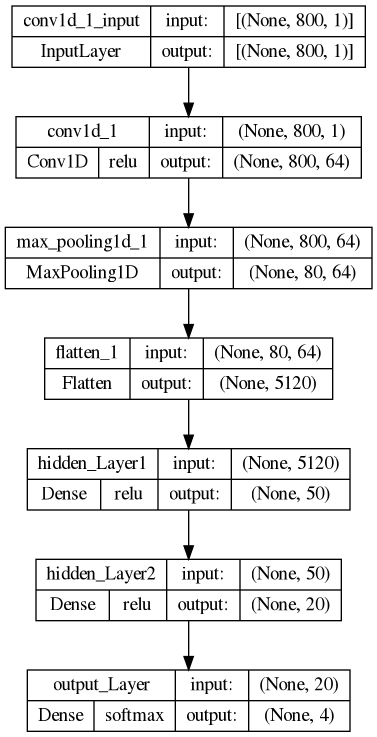

In [28]:
import tensorflow as tf
from tensorflow import keras

nFeatures = x_train.shape[1]
modelCC = keras.models.Sequential()
modelCC.add(keras.layers.Conv1D(filters = 64, kernel_size = 40, padding = 'same', activation='relu',input_shape=(nFeatures, 1)))
modelCC.add(keras.layers.MaxPooling1D(pool_size=10))
modelCC.add(keras.layers.Flatten())
modelCC.add(keras.layers.Dense(50, activation='relu', name='hidden_Layer1'))
modelCC.add(keras.layers.Dense(20, activation='relu', name='hidden_Layer2'))
modelCC.add(keras.layers.Dense(len(uv), activation='softmax', name='output_Layer'))

metrics = ['accuracy','mae']

modelCC.compile(optimizer = 'adam',
                loss      = 'categorical_crossentropy',
                metrics   = metrics)

from tensorflow.keras.utils import plot_model
plot_model(modelCC, show_shapes=True, show_layer_names=True, show_layer_activations=True)


#### Reshaping of the data

<div class="rqT" title="reshape?">

Reshaping means changing the shape of an array.

The shape of an array is the number of elements in each dimension. Wanna try it? <a href="./AdvancedPython.ipynb#reshape">Load the "AdvancedPython.ipynb" notebook</a>
</div>

In [22]:
print(f"shape of x_train = {x_train.shape}")
print(f"shape of y_train = {y_train.shape}")
x_train4C1D = x_train.values.reshape(x_train.shape[0], x_train.shape[1], 1)
x_test4C1D = x_test.values.reshape(x_test.shape[0], x_test.shape[1], 1)
print(f"shape of x_train4C1D = {x_train4C1D.shape}")

shape of x_train = (6401, 800)
shape of y_train = (6401, 4)
shape of x_train4C1D = (6401, 800, 1)


#### Training

In [23]:
vID.chrono_start()
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=30)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2,
                              patience=10, min_lr=0.001, mode='auto')

historyCC = modelCC.fit(x_train4C1D,
                      y_train,
                      epochs          = 700,
                      batch_size      = 10,
                      verbose         = 1,
                      validation_data = (x_test4C1D, y_test),
                      callbacks=[es,reduce_lr])
vID.chrono_show()

Epoch 1/700
641/641 [==============================] - 4s 4ms/step - loss: 0.0650 - accuracy: 0.9769 - mae: 0.0201 - val_loss: 3.4898e-04 - val_accuracy: 1.0000 - val_mae: 1.7431e-04 - lr: 0.0010
Epoch 2/700
641/641 [==============================] - 3s 4ms/step - loss: 0.0239 - accuracy: 0.9967 - mae: 0.0026 - val_loss: 1.9025e-04 - val_accuracy: 1.0000 - val_mae: 9.5084e-05 - lr: 0.0010
Epoch 3/700
641/641 [==============================] - 3s 4ms/step - loss: 8.7644e-05 - accuracy: 1.0000 - mae: 4.3809e-05 - val_loss: 4.8216e-05 - val_accuracy: 1.0000 - val_mae: 2.4107e-05 - lr: 0.0010
Epoch 4/700
641/641 [==============================] - 3s 4ms/step - loss: 3.9104e-05 - accuracy: 1.0000 - mae: 1.9551e-05 - val_loss: 2.5676e-05 - val_accuracy: 1.0000 - val_mae: 1.2839e-05 - lr: 0.0010
Epoch 5/700
641/641 [==============================] - 3s 4ms/step - loss: 2.3214e-05 - accuracy: 1.0000 - mae: 1.1607e-05 - val_loss: 1.5988e-05 - val_accuracy: 1.0000 - val_mae: 7.9944e-06 - lr: 0.0

#### Evaluation of the accuracy

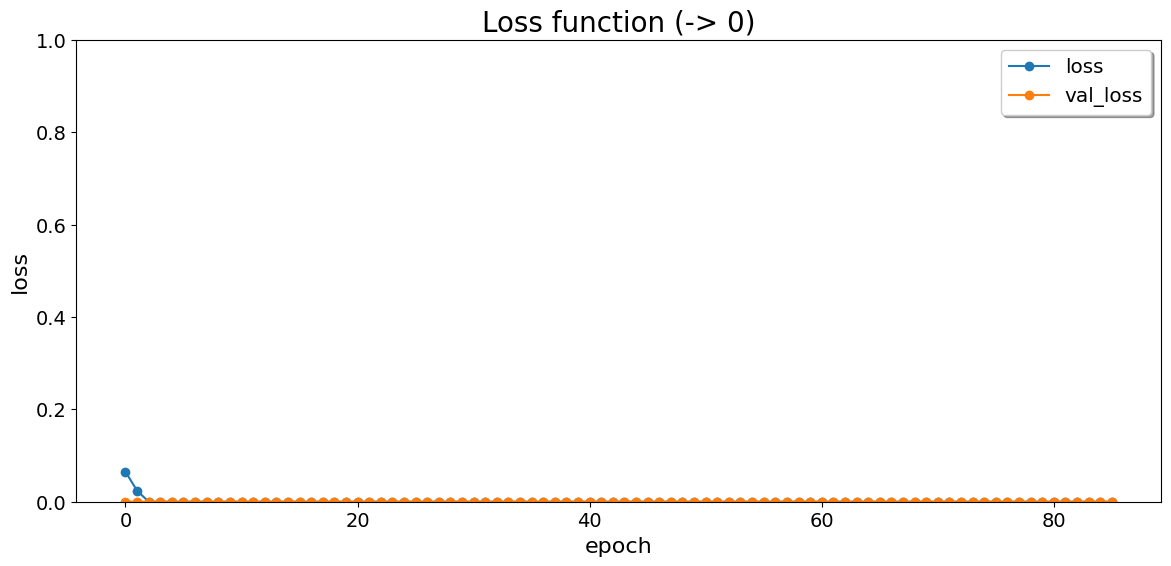

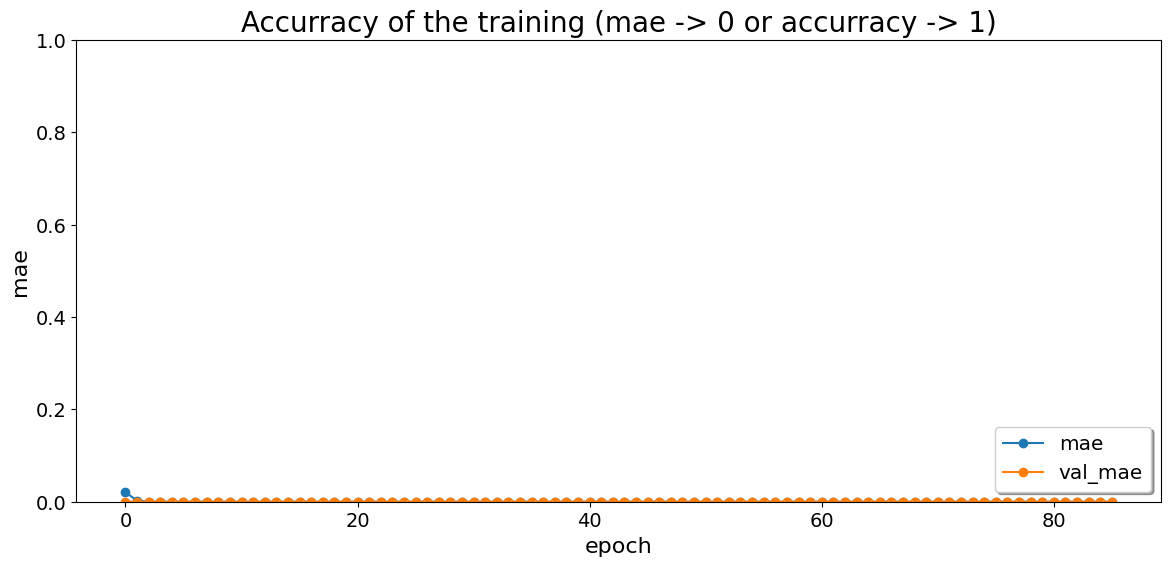

In [24]:
plotEpochs(historyCC,"mae")

In [25]:
printAcc(modelCC, x_train, y_train, x_test, y_test)

x_train / loss      : 0.0000
x_train / accuracy  : 1.0000
x_train / mae       : 0.0000

 x_test / loss      : 0.0000
 x_test / accuracy  : 1.0000
 x_test / mae       : 0.0000


50/50 [==============================] - 0s 3ms/step


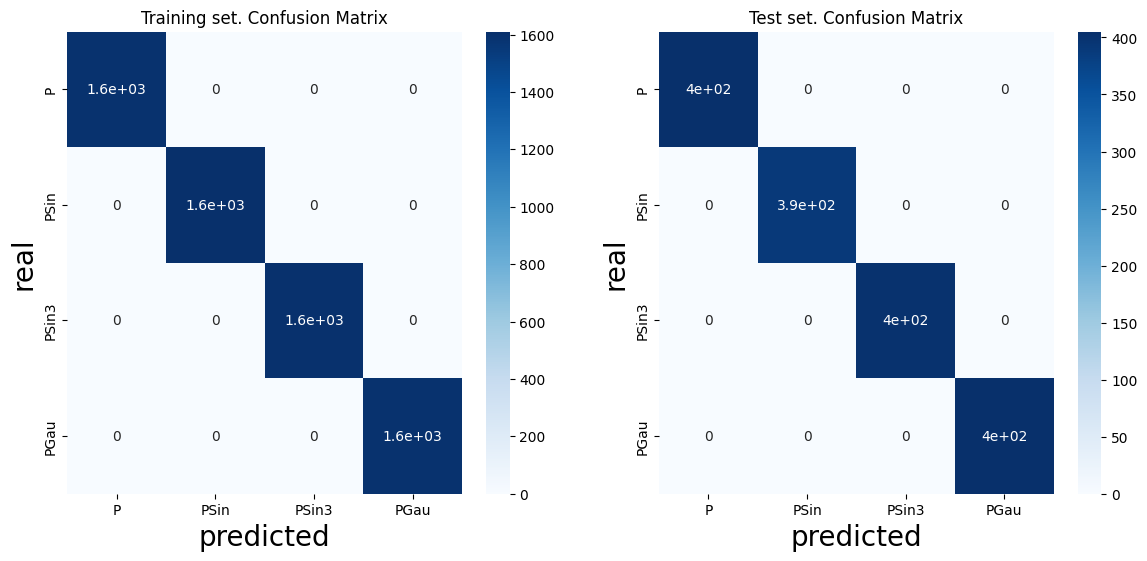

                Accurracy       MAE         MSE
 Training set.      1.00        0.00        0.00
     Test set.      1.00        0.00        0.00


In [26]:
y_train_hat = modelCC.predict(x_train)
y_test_hat = modelCC.predict(x_test)    

plotConfusionMatrix(y_train, y_train_hat, y_test, y_test_hat, uv)

### Order of the polynomial identified by regression

#### With a standard, dense NN

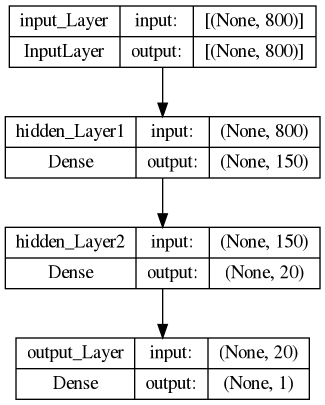

In [333]:
import tensorflow as tf
from tensorflow import keras

nFeatures = x_train.shape[1]
modelRD = keras.models.Sequential() #modelRD as regression with dense layers
modelRD.add(keras.layers.Input(nFeatures, name='input_Layer'))
modelRD.add(keras.layers.Dense(150, activation='relu', name='hidden_Layer1'))
modelRD.add(keras.layers.Dense( 20, activation='relu', name='hidden_Layer2'))
modelRD.add(keras.layers.Dense(1, name='output_Layer'))

modelRD.compile(optimizer = 'adam',
              loss      = 'mse',
              metrics   = ['accuracy','mae'] )

from tensorflow.keras.utils import plot_model
plot_model(modelRD, show_shapes=True, show_layer_names=True, show_layer_activations=True)


In [336]:
vID.chrono_start()
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=30)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2,
                              patience=10, min_lr=0.001)
modelRD.summary()
vID.chrono_start()
historyRD = modelRD.fit(x_train,
                        yOrder_train,
                        epochs          = 700,
                        batch_size      = 10,
                        verbose         = 1,
                        validation_data = (x_test, yOrder_test),
                       callbacks=[es,reduce_lr]
                       )
vID.chrono_show()

Model: "sequential_32"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 hidden_Layer1 (Dense)       (None, 150)               120150    
                                                                 
 hidden_Layer2 (Dense)       (None, 20)                3020      
                                                                 
 output_Layer (Dense)        (None, 1)                 21        
                                                                 
Total params: 123191 (481.21 KB)
Trainable params: 123191 (481.21 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/700
641/641 [==============================] - 2s 2ms/step - loss: 0.0080 - accuracy: 0.2993 - mae: 0.0598 - val_loss: 0.5678 - val_accuracy: 0.3025 - val_mae: 0.1127 - lr: 0.0010
Epoch 2/700
641/641 [==============================] - 2s 3ms/step - loss: 0.0093 - accur

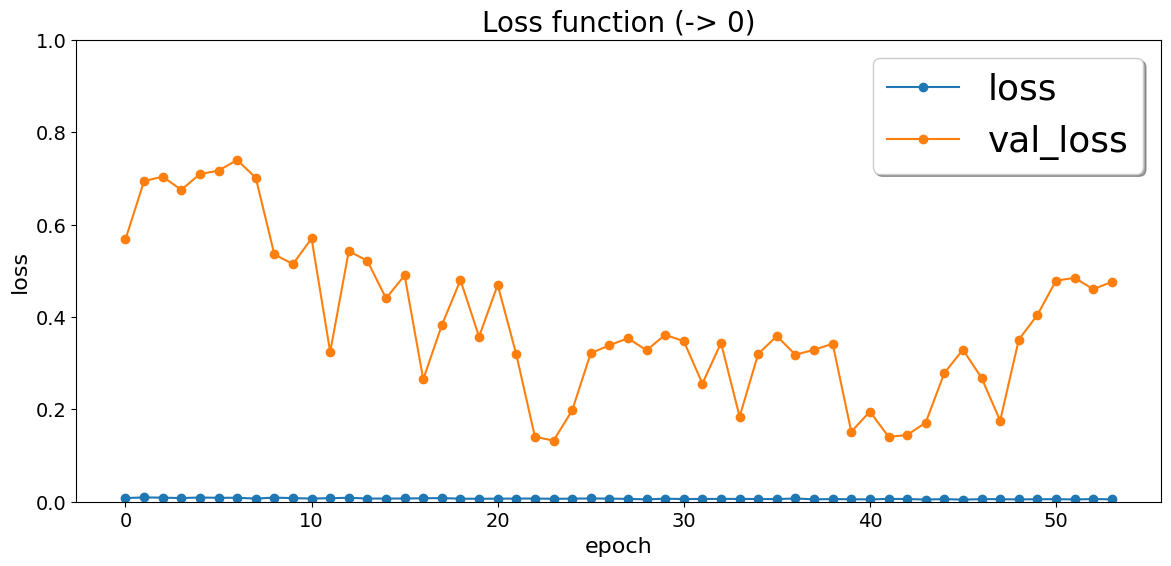

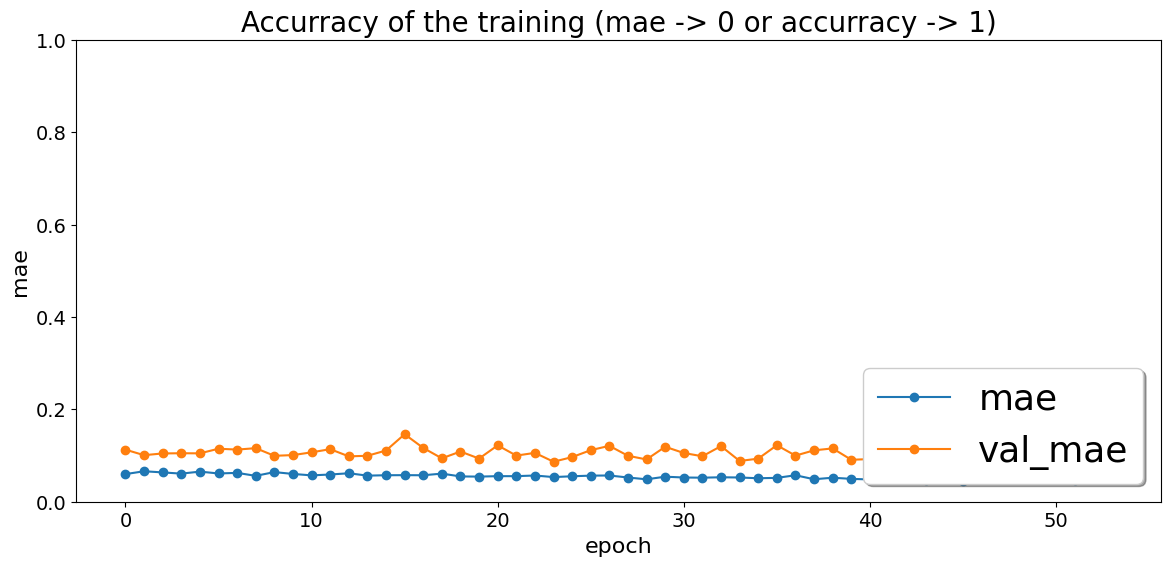

In [337]:
plotEpochs(historyRD,"mae")

In [338]:
printAcc(modelRD, x_train, yOrder_train, x_test, yOrder_test)

x_train / loss      : 0.0031
x_train / accuracy  : 0.2993
x_train / mae       : 0.0372

 x_test / loss      : 0.4759
 x_test / accuracy  : 0.3025
 x_test / mae       : 0.0971


 6 catégories uniques : [1 4 2 3 5 0]


50/50 [==============================] - 0s 2ms/step


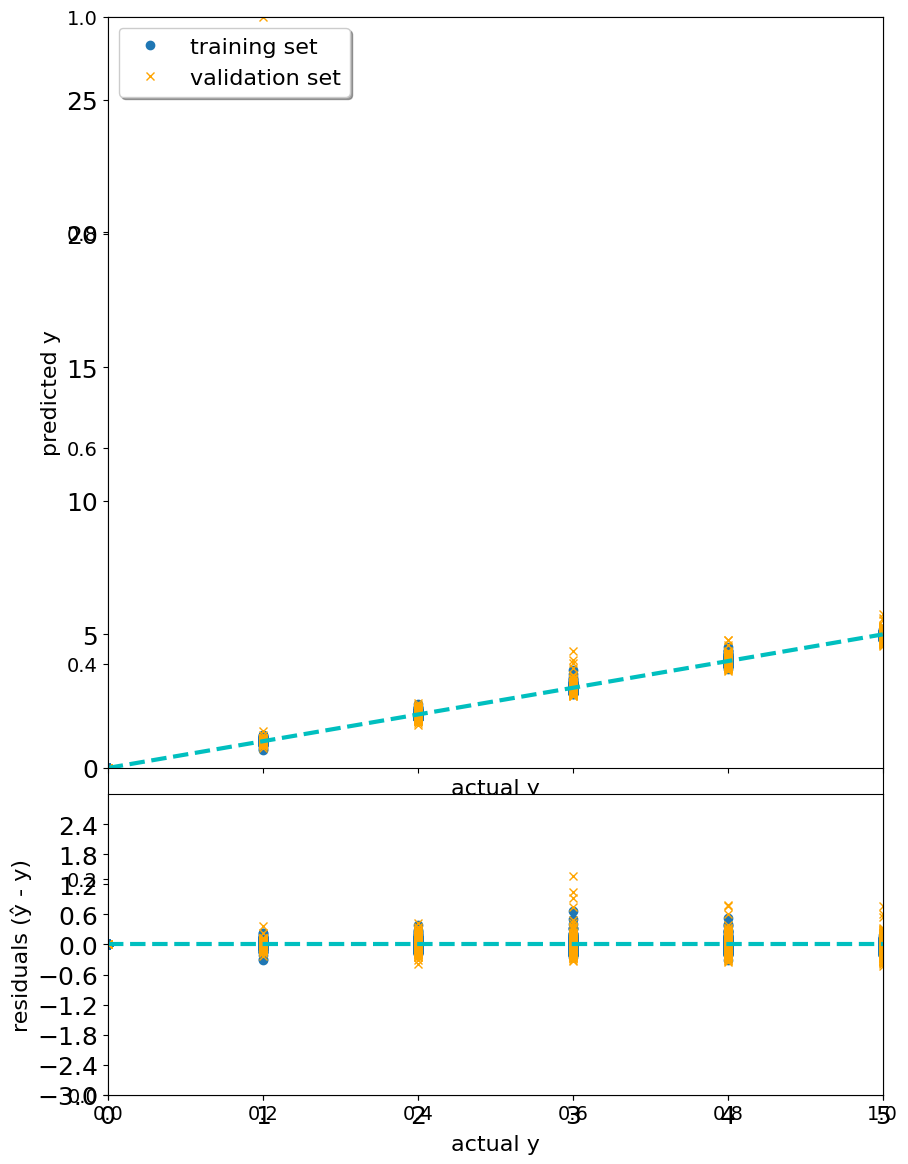

                    MAE         MSE
 Training set.      0.04        0.00
     Test set.      0.10        0.48


50/50 [==============================] - 0s 1ms/step


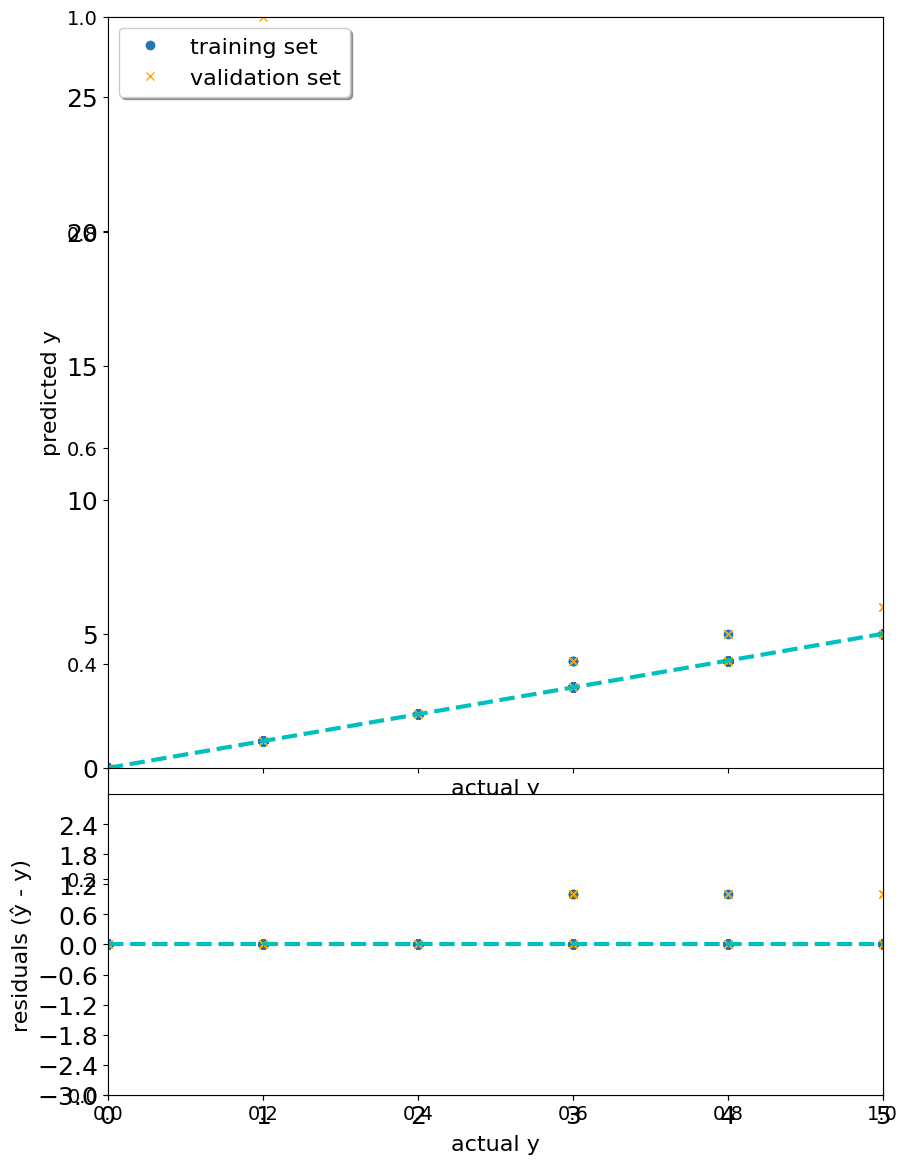

                    MAE         MSE
 Training set.      0.00        0.00
     Test set.      0.02        0.46


In [339]:
def plotCorrelation(model, x_train, y_train, x_test, y_test, uv, round=False):
    import matplotlib.pyplot as plt
    import matplotlib.gridspec as gridspec
    from matplotlib.ticker import MaxNLocator
    import seaborn as sns
    from sklearn.metrics import accuracy_score
    from sklearn.metrics import mean_absolute_error
    from sklearn.metrics import mean_squared_error
    
    y_train_hat = model.predict(x_train)
    y_test_hat = model.predict(x_test)
    y_train_hatInteger = np.round(y_train_hat)
    y_test_hatInteger = np.round(y_test_hat)

    if round:
        ytrh = y_train_hatInteger
        ytth = y_test_hatInteger
        diffytr = y_train_hatInteger.ravel() - y_train.ravel()
        diffytt = y_test_hatInteger.ravel() - y_test.ravel()
    else:
        ytrh = y_train_hat
        ytth = y_test_hat
        diffytr = y_train_hat.ravel() - y_train.ravel()
        diffytt = y_test_hat.ravel() - y_test.ravel()
    
    if (round):
        y_hatMax = max([max(y_train_hatInteger.ravel()), max(y_test_hatInteger.ravel())])
        yMax = max([max(y_train.ravel()), max(y_test.ravel())])
        y_hatMin = min([min(y_train_hatInteger.ravel()), min(y_test_hatInteger.ravel())])
        yMin = min([min(y_train.ravel()), min(y_test.ravel())])
    else:
        y_hatMax = max([max(y_train_hat.ravel()), max(y_test_hat.ravel())])
        yMax = max([max(y_train.ravel()), max(y_test.ravel())])
        y_hatMin = min([min(y_train_hat.ravel()), min(y_test_hat.ravel())])
        yMin = min([min(y_train.ravel()), min(y_test.ravel())])

    cDMin = min(yMin,y_hatMin)
    cDMax = max(yMax, y_hatMax)
    fig = plt.figure(figsize=(10, 14))
    plt.rcParams["font.size"] = (18) #font size
    plt.tick_params(labelsize = 14)
    gs = gridspec.GridSpec(2, 1, height_ratios=[10, 4], hspace=0.05)

    ax0=plt.subplot(gs[0])
    ax0.plot(y_train,ytrh,'o',color="#1f77b4",label='training set')
    ax0.plot(y_test,ytth,'x',color="orange",label='validation set')
    ax0.plot([yMin,yMax],[yMin,yMax],'c',linestyle='--',lw=3)
    ax0.set_xlabel('actual y',fontsize=16)
    ax0.set_ylabel('predicted y',fontsize=16)
    ax0.set_xlim(yMin,yMax);ax0.set_ylim(cDMin,cDMax) 
    ax0.legend(loc='upper left', shadow=True, fontsize='16')
    plt.setp(ax0.get_xticklabels(), visible=False) #cosmetics
    
    ax1=plt.subplot(gs[1])
    ax1.plot(y_train,diffytr,'o',color="#1f77b4",label='training set')
    ax1.plot(y_test,diffytt,'x',color="orange",label='validation set')
    ax1.axhline(y=0, xmin=yMin, xmax=yMax, color='c', linestyle='--', linewidth=3)
    ax1.set_xlabel('actual y',fontsize=16)
    ax1.set_ylabel(f'residuals (ŷ - y)',fontsize=16)
    ax1.set_xlim(yMin,yMax); ax1.set_ylim(-3,3)
    ax1.axes.get_yaxis().set_major_locator(MaxNLocator(prune='upper'))  #cosmetics

    plt.show()
    maetr = mean_absolute_error(y_train.to_numpy(),ytrh)
    maett = mean_absolute_error(y_test.to_numpy(),ytth)
    msetr = mean_squared_error(y_train.to_numpy(),ytrh)
    msett = mean_squared_error(y_test.to_numpy(),ytth)
    print(f"{hl.BOLD}{fg.BLUE}                    MAE         MSE")
    print(f"{hl.BOLD}{fg.PURPLE} Training set.      {maetr:.2f}        {msetr:.2f}")
    print(f"{hl.BOLD}{fg.GREEN}     Test set.      {maett:.2f}        {msett:.2f}")
    return


uvO = dfY["order"].unique()
print(f"{len(uvO):2} catégories uniques : {uvO}")
t4pPC.centerTitle("orders = real values")
plotCorrelation(modelRD,x_train, yOrder_train, x_test, yOrder_test, uvO, round=False)
t4pPC.centerTitle("orders = nearest integer of predicted values")
plotCorrelation(modelRD,x_train, yOrder_train, x_test, yOrder_test, uvO, round=True)

#### With a 1D convolutional NN

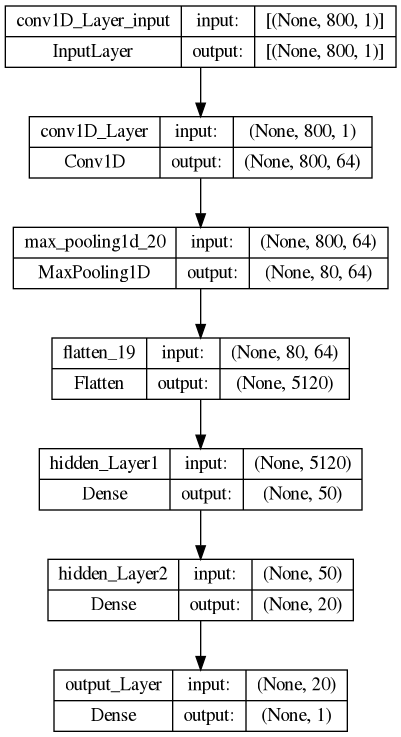

In [340]:
import tensorflow as tf
from tensorflow import keras

nFeatures = x_train.shape[1]
modelRC = keras.models.Sequential()
modelRC.add(keras.layers.Conv1D(filters = 64, kernel_size = 40, name = "conv1D_Layer",
                                padding = 'same', activation='relu',input_shape=(nFeatures, 1)))
modelRC.add(keras.layers.MaxPooling1D(pool_size=10))
modelRC.add(keras.layers.Flatten())
modelRC.add(keras.layers.Dense(50, activation='relu', name='hidden_Layer1'))
modelRC.add(keras.layers.Dense(20, activation='relu', name='hidden_Layer2'))
modelRC.add(keras.layers.Dense(1, name='output_Layer'))

modelRC.compile(optimizer = 'adam',
              loss      = 'mse',
              metrics   = ['accuracy','mae'] )

from tensorflow.keras.utils import plot_model
plot_model(modelRC, show_shapes=True, show_layer_names=True, show_layer_activations=True, show_layer_activations=True)


In [341]:
vID.chrono_start()
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=30)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2,
                              patience=10, min_lr=0.001)
modelRC.summary()
vID.chrono_start()
historyRC = modelRC.fit(x_train,
                        yOrder_train,
                        epochs          = 700,
                        batch_size      = 10,
                        verbose         = 1,
                        validation_data = (x_test, yOrder_test),
                        callbacks=[es,reduce_lr])
vID.chrono_show()

Model: "sequential_33"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1D_Layer (Conv1D)       (None, 800, 64)           2624      
                                                                 
 max_pooling1d_20 (MaxPooli  (None, 80, 64)            0         
 ng1D)                                                           
                                                                 
 flatten_19 (Flatten)        (None, 5120)              0         
                                                                 
 hidden_Layer1 (Dense)       (None, 50)                256050    
                                                                 
 hidden_Layer2 (Dense)       (None, 20)                1020      
                                                                 
 output_Layer (Dense)        (None, 1)                 21        
                                                     

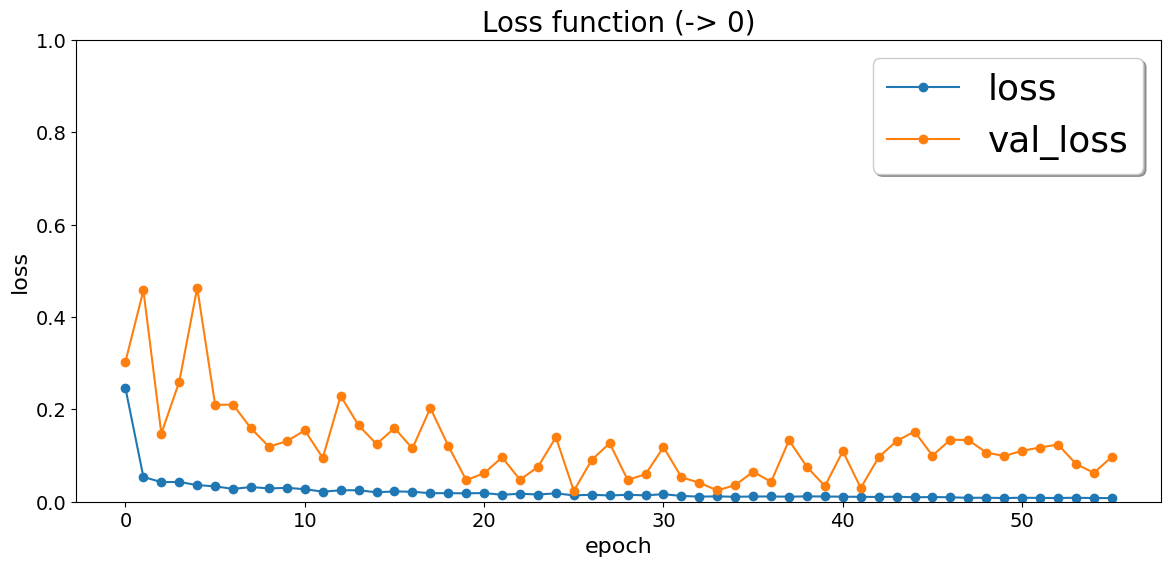

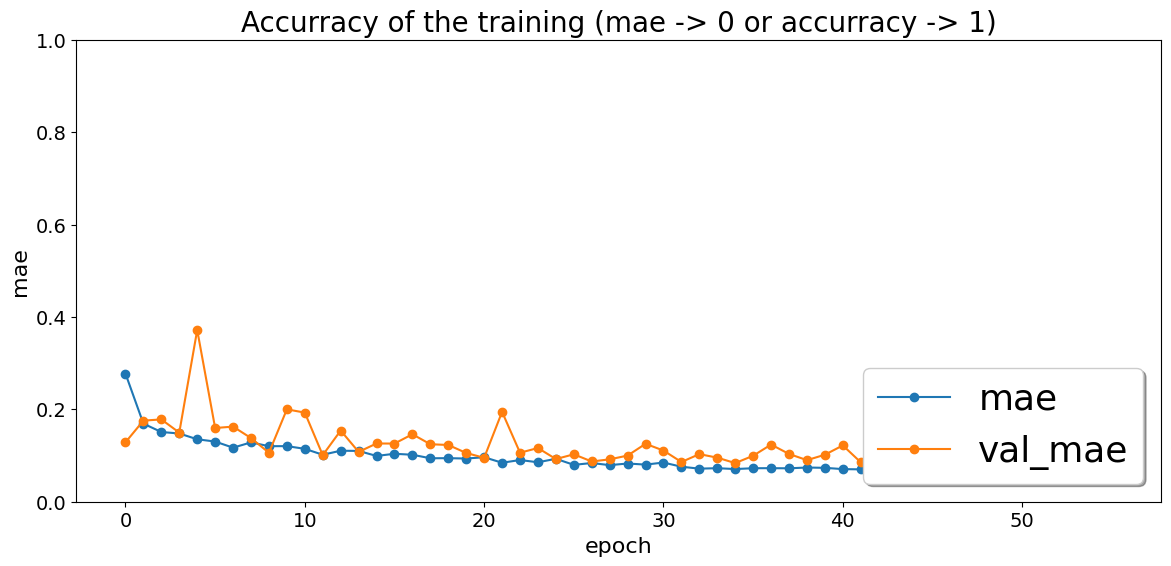

In [343]:
plotEpochs(historyRC,"mae")

In [344]:
printAcc(modelRC, x_train, yOrder_train, x_test, yOrder_test)

x_train / loss      : 0.0136
x_train / accuracy  : 0.2993
x_train / mae       : 0.0863

 x_test / loss      : 0.0971
 x_test / accuracy  : 0.3025
 x_test / mae       : 0.1117


 6 catégories uniques : [1 4 2 3 5 0]


50/50 [==============================] - 0s 3ms/step


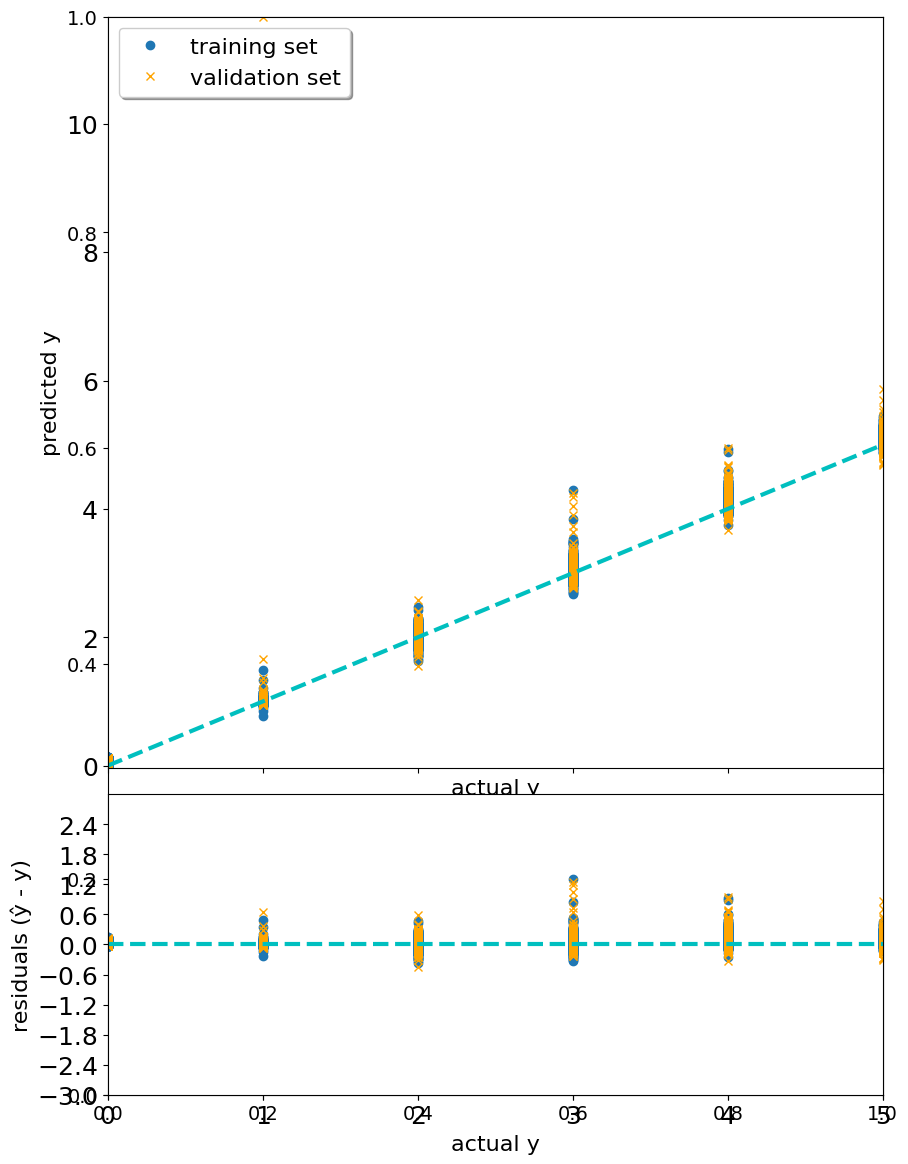

                    MAE         MSE
 Training set.      0.09        0.01
     Test set.      0.11        0.10


50/50 [==============================] - 0s 4ms/step


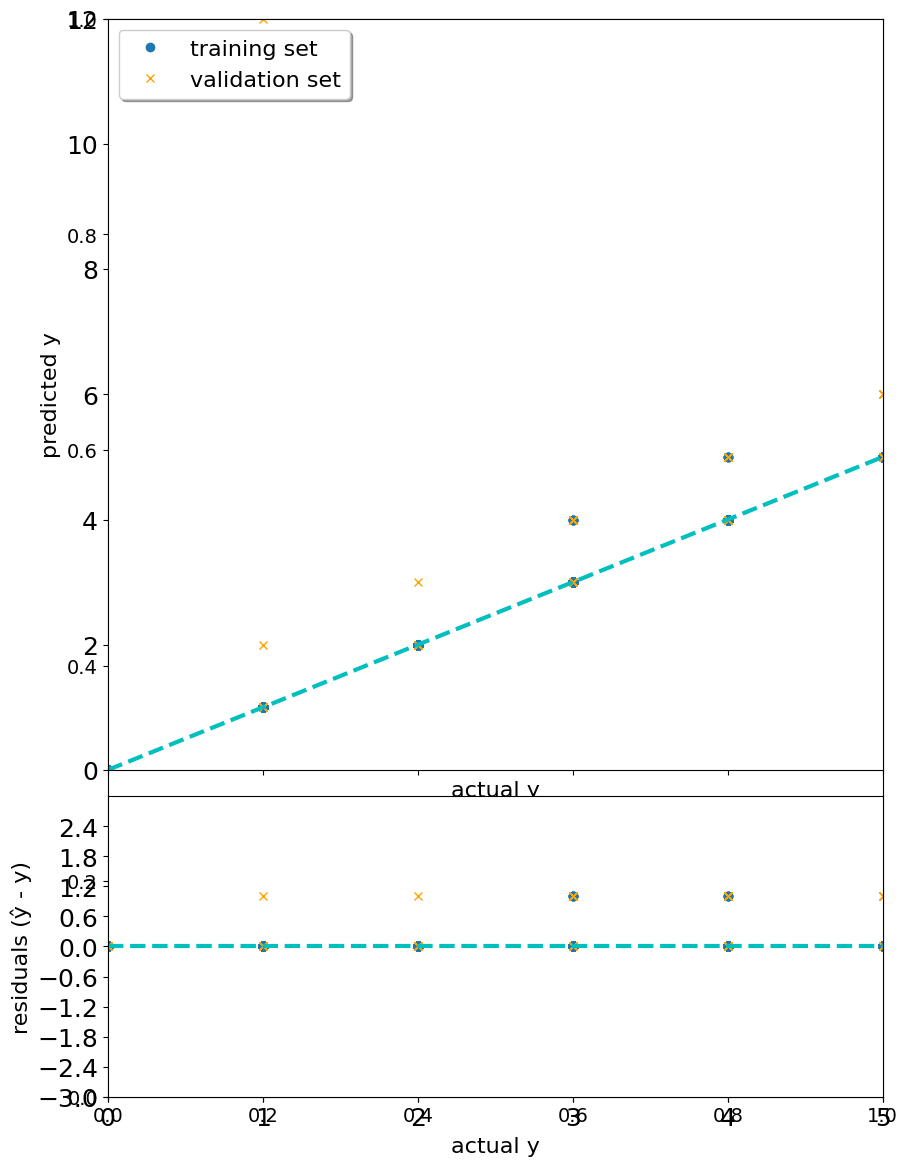

                    MAE         MSE
 Training set.      0.00        0.00
     Test set.      0.02        0.09


In [345]:
uvO = dfY["order"].unique()
print(f"{len(uvO):2} catégories uniques : {uvO}")
t4pPC.centerTitle("orders = real values")
plotCorrelation(modelRC,x_train, yOrder_train, x_test, yOrder_test, uvO, round=False)
t4pPC.centerTitle("orders = nearest integer of predicted values")
plotCorrelation(modelRC,x_train, yOrder_train, x_test, yOrder_test, uvO, round=True)

## Appendix. Generation of hundreds of noisy functions

In [2]:
def gaussian(x, mu, sigma):
    return np.exp(-(x - mu)**2 / (2 * sigma**2.))/(sigma*np.sqrt(2*np.pi))

def noiseF(f, x, amplitudeNoise=1, plotF=False):
    import numpy as np
    import matplotlib.pyplot as plt
    nbp = f.shape
    Noise = amplitudeNoise * np.random.normal(0,1,nbp)
    if (plotF):
        plt.plot(x,f+Noise)
        plt.show()
    return f+Noise

def generatePolynomial(i,X,degree,rangeCoeff):
    '''
    will return a polynomial of the form ax^degree + .... + z
    '''
    import random as rnd
    import numpy as np
    zeroC = [0]
    coefficients = [0]
    # avoid coefficients all = 0
    while coefficients == zeroC:
        coefficients = [] + [rnd.randint(-rangeCoeff, rangeCoeff) for _ in range(degree+1)]
        zeroC = list(np.zeros(len(coefficients)))
        #print("loop coeffs", degree, coefficients)
    # coefficient n cannot be = 0 either
    Cn = coefficients[degree]
    while Cn == 0:
        Cn = rnd.randint(-rangeCoeff, rangeCoeff)
        print("loop Cn", degree, Cn)
    coefficients[degree] = Cn
    print(f"Function {i:6}. Degree = {degree:5}. {len(coefficients)} coefficients = {coefficients}")
    P = sum((coefficient*X**n for n, coefficient in enumerate(coefficients)))
    return P

def generatePolynomialExp(i,X,degree,rangeCoeff):
    '''
    will return a polynomial of the form (ax^degree + .... + z)*exp(x)
    '''
    import random as rnd
    import numpy as np
    P = generatePolynomial(i,X,degree,rangeCoeff)
    P = P*np.exp(x/10)
    return P

def generatePolynomialSin(i,X,degree,rangeCoeff):
    '''
    will return a polynomial of the form (ax^degree + .... + z)*sin(x)
    '''
    import random as rnd
    import numpy as np
    P = generatePolynomial(i,X,degree,rangeCoeff)
    P = P*np.sin(x)
    return P

def generatePolynomialSin3(i,X,degree,rangeCoeff):
    '''
    will return a polynomial of the form (ax^degree + .... + z)*sin(x)^3
    '''
    import random as rnd
    import numpy as np
    P = generatePolynomial(i,X,degree,rangeCoeff)
    P = P*np.sin(x)**3
    return P
    
def generatePolynomialGau(i,X,degree,rangeCoeff):
    '''
    will return a polynomial of the form (ax^degree + .... + z)*ln(x)
    '''
    import random as rnd
    import numpy as np
    P = generatePolynomial(i,X,degree,rangeCoeff)
    P = np.convolve(P,gaussian(x,5.0,1),'same')
    return P

def generatePolynomialSinc(i,X,degree,rangeCoeff):
    '''
    will return a polynomial of the form (ax^degree + .... + z)*ln(x)
    '''
    import random as rnd
    P = generatePolynomial(i,X,degree,rangeCoeff)
    P = P*np.sinc(x)
    return P

In [3]:
import numpy as np
import pandas as pd
import random as rnd
import matplotlib.pyplot as plt

x = np.arange(0.05,40.05,0.05)

dfF = pd.DataFrame() 
dfF["x"] = x
display(dfF)
dfY = pd.DataFrame(columns=["F","order"])

nP = 2000 # number of polynomials per category
nOP = 5 # maximal degree of polynomials
rangePC = 20 # polynomial coefficients will belong to [-rangeCP,+rangeCP]
PlotFunctions = False
NoiseScaling = 30

t4pPC.centerTitle(f"Generation of {nP} polynomials. Maximal degree = {nOP}. Coefficients in the range [-{rangePC},{rangePC}]")
for i in range(nP):
    orderPi = rnd.randint(1,nOP)
    P = generatePolynomial(i,x,orderPi,rangePC)
    tab = noiseF(P,x,(max(P)-min(P))/NoiseScaling,PlotFunctions)
    Flabel = "F_" + str(i).zfill(5)
    dfFi = pd.DataFrame()
    dfFi[Flabel] = tab
    dfF = pd.concat([dfF,dfFi],axis=1)
    dfY.loc[Flabel] = ["P",orderPi]

# t4pPC.centerTitle(f"Generation of {nP} polynomials x exp(x/10). Maximal degree = {nOP}. Coefficients in the range [-{rangePC},{rangePC}]")
# for i in range(nP,2*nP):
#     orderPi = rnd.randint(0,nOP)
#     P = generatePolynomialExp(i,x,orderPi,rangePC)
#     tab = noiseF(P,x,(max(P)-min(P))/NoiseScaling,PlotFunctions)
#     Flabel = "F_" + str(i).zfill(5)
#     dfFi = pd.DataFrame()
#     dfFi[Flabel] = tab
#     dfF = pd.concat([dfF,dfFi],axis=1)
#     dfY.loc[Flabel] = ["PExp",orderPi]   

t4pPC.centerTitle(f"Generation of {nP} polynomials x sin(x). Maximal degree = {nOP}. Coefficients in the range [-{rangePC},{rangePC}]")
for i in range(nP,2*nP):
    orderPi = rnd.randint(0,nOP)
    P = generatePolynomialSin(i,x,orderPi,rangePC)
    tab = noiseF(P,x,(max(P)-min(P))/NoiseScaling,PlotFunctions)
    Flabel = "F_" + str(i).zfill(5)
    dfFi = pd.DataFrame()
    dfFi[Flabel] = tab
    dfF = pd.concat([dfF,dfFi],axis=1)
    dfY.loc[Flabel] = ["PSin",orderPi]   

t4pPC.centerTitle(f"Generation of {nP} polynomials x sin(x)^3. Maximal degree = {nOP}. Coefficients in the range [-{rangePC},{rangePC}]")
for i in range(2*nP,3*nP):
    orderPi = rnd.randint(0,nOP)
    P = generatePolynomialSin3(i,x,orderPi,rangePC)
    tab = noiseF(P,x,(max(P)-min(P))/NoiseScaling,PlotFunctions)
    Flabel = "F_" + str(i).zfill(5)
    dfFi = pd.DataFrame()
    dfFi[Flabel] = tab
    dfF = pd.concat([dfF,dfFi],axis=1)
    dfY.loc[Flabel] = ["PSin3",orderPi]   

t4pPC.centerTitle(f"Generation of {nP} polynomials convolved with a Gaussian function. Maximal degree = {nOP}. Coefficients in the range [-{rangePC},{rangePC}]")
for i in range(3*nP,4*nP):
    orderPi = rnd.randint(0,nOP)
    P = generatePolynomialGau(i,x,orderPi,rangePC)
    tab = noiseF(P,x,(max(P)-min(P))/NoiseScaling,PlotFunctions)
    Flabel = "F_" + str(i).zfill(5)
    dfFi = pd.DataFrame()
    dfFi[Flabel] = tab
    dfF = pd.concat([dfF,dfFi],axis=1)
    dfY.loc[Flabel] = ["PGau",orderPi]   

# t4pPC.centerTitle(f"Generation of {nP} polynomials x sinc(x). Maximal degree = {nOP}. Coefficients in the range [-{rangePC},{rangePC}]")
# for i in range(3*nP,4*nP):
#     orderPi = rnd.randint(0,nOP)
#     P = generatePolynomialSinc(i,x,orderPi,rangePC)
#     tab = noiseF(P,x,(max(P)-min(P))/NoiseScaling,PlotFunctions)
#     Flabel = "F_" + str(i).zfill(5)
#     dfFi = pd.DataFrame()
#     dfFi[Flabel] = tab
#     dfF = pd.concat([dfF,dfFi],axis=1)
#     dfY.loc[Flabel] = ["PSinc",orderPi]   

display(dfF)
display(dfY)
pathway = "./ML-data/"
dfF.to_csv(pathway+"Conv1D_functions.csv",sep="\t")
dfY.to_csv(pathway+"Conv1D_labels.csv",sep="\t")

x
0     0.05
1     0.10
2     0.15
3     0.20
4     0.25
..     ...
795  39.80
796  39.85
797  39.90
798  39.95
799  40.00

[800 rows x 1 columns]

Function      0. Degree =     2. 3 coefficients = [-12, 18, 10]
Function      1. Degree =     5. 6 coefficients = [-20, -20, -19, -4, -19, 13]
Function      2. Degree =     4. 5 coefficients = [7, -2, 10, 20, -12]
Function      3. Degree =     2. 3 coefficients = [19, -6, -2]
Function      4. Degree =     2. 3 coefficients = [-9, -6, -12]
Function      5. Degree =     2. 3 coefficients = [0, -2, -2]
Function      6. Degree =     1. 2 coefficients = [-18, 17]
Function      7. Degree =     4. 5 coefficients = [-10, 8, 11, -6, 18]
Function      8. Degree =     1. 2 coefficients = [-18, -18]
Function      9. Degree =     3. 4 coefficients = [-5, -16, 12, -12]
Function     10. Degree =     1. 2 coefficients = [15, -14]
Function     11. Degree =     5. 6 coefficients = [19, 10, 11, 11, 16, -19]
Function     12. Degree =     1. 2 coefficients = [15, 4]
Function     13. Degree =     1. 2 coefficients = [-1, -1]
Function     14. Degree =     2. 3 coefficients = [0, -6, 4]
Function     15. Degre

Function   2000. Degree =     4. 5 coefficients = [9, 18, 4, 19, 6]
Function   2001. Degree =     0. 1 coefficients = [-6]
Function   2002. Degree =     2. 3 coefficients = [-14, -10, 6]
Function   2003. Degree =     3. 4 coefficients = [15, 7, -9, 17]
Function   2004. Degree =     3. 4 coefficients = [8, 0, 15, 7]
Function   2005. Degree =     2. 3 coefficients = [-6, 16, 9]
Function   2006. Degree =     2. 3 coefficients = [16, 6, -11]
Function   2007. Degree =     5. 6 coefficients = [-7, 17, 4, -16, -12, 10]
Function   2008. Degree =     2. 3 coefficients = [12, -10, -20]
Function   2009. Degree =     4. 5 coefficients = [-7, -19, -18, -13, -20]
Function   2010. Degree =     3. 4 coefficients = [8, -15, -6, -20]
Function   2011. Degree =     5. 6 coefficients = [-20, 15, 3, -5, 15, 5]
Function   2012. Degree =     3. 4 coefficients = [9, 20, 19, 3]
Function   2013. Degree =     1. 2 coefficients = [-4, -7]
Function   2014. Degree =     0. 1 coefficients = [18]
Function   2015. Degr

Function   4000. Degree =     1. 2 coefficients = [-4, 3]
Function   4001. Degree =     3. 4 coefficients = [15, 16, -3, -18]
Function   4002. Degree =     4. 5 coefficients = [-5, 13, -18, 2, -19]
Function   4003. Degree =     1. 2 coefficients = [16, 19]
Function   4004. Degree =     0. 1 coefficients = [6]
Function   4005. Degree =     1. 2 coefficients = [15, -8]
Function   4006. Degree =     0. 1 coefficients = [19]
Function   4007. Degree =     1. 2 coefficients = [-14, -19]
Function   4008. Degree =     1. 2 coefficients = [7, 4]
Function   4009. Degree =     5. 6 coefficients = [9, -4, 20, 15, 2, -13]
Function   4010. Degree =     3. 4 coefficients = [-16, 5, -20, -16]
Function   4011. Degree =     4. 5 coefficients = [5, 19, -1, 12, 5]
Function   4012. Degree =     0. 1 coefficients = [-12]
Function   4013. Degree =     4. 5 coefficients = [-4, 6, 20, 11, 8]
Function   4014. Degree =     2. 3 coefficients = [-13, -3, -15]
Function   4015. Degree =     0. 1 coefficients = [15]


Function   6000. Degree =     5. 6 coefficients = [16, 15, 15, 9, -6, 4]
Function   6001. Degree =     2. 3 coefficients = [2, 6, -5]
Function   6002. Degree =     3. 4 coefficients = [-5, 5, 6, -20]
Function   6003. Degree =     5. 6 coefficients = [-17, -7, -3, 2, -1, 8]
Function   6004. Degree =     2. 3 coefficients = [-6, -6, -13]
Function   6005. Degree =     0. 1 coefficients = [11]
Function   6006. Degree =     5. 6 coefficients = [-18, -17, 13, 0, 16, -17]
Function   6007. Degree =     1. 2 coefficients = [1, 1]
Function   6008. Degree =     0. 1 coefficients = [-15]
Function   6009. Degree =     3. 4 coefficients = [11, -2, 6, -5]
Function   6010. Degree =     4. 5 coefficients = [8, 0, 8, 11, -14]
Function   6011. Degree =     4. 5 coefficients = [-5, -20, -7, 11, -8]
Function   6012. Degree =     4. 5 coefficients = [0, -16, -16, -16, 7]
Function   6013. Degree =     3. 4 coefficients = [-6, 6, 2, 4]
Function   6014. Degree =     5. 6 coefficients = [1, 0, 11, -12, -9, 17]


x       F_00000       F_00001       F_00002      F_00003  \
0     0.05    550.171021 -1.965192e+07  6.948856e+05   -63.492923   
1     0.10   -775.339409 -5.478954e+07 -8.278948e+05   -48.268840   
2     0.15   -183.660240  2.249674e+07  1.349384e+06  -255.083047   
3     0.20   -995.103193  9.610952e+06  8.396922e+05   -10.979958   
4     0.25     70.999700  3.133841e+07  1.705852e+06   189.230452   
..     ...           ...           ...           ...          ...   
795  39.80  15965.289531  1.231645e+09 -2.948668e+07 -3339.660066   
796  39.85  17239.595380  1.293394e+09 -2.919162e+07 -3462.296310   
797  39.90  16752.013466  1.322353e+09 -2.846552e+07 -3364.138052   
798  39.95  16658.286195  1.232417e+09 -2.955576e+07 -3705.544332   
799  40.00  17665.182896  1.305561e+09 -2.876869e+07 -3390.433717   

          F_00004      F_00005     F_00006       F_00007     F_00008  ...  \
0       31.925608    41.350936  -37.632808 -2.112322e+06  -28.135311  ...   
1     -214.751392   -81.001649  -23.551657  1.068119e+06    9.740560  ...   
2      447.490853   144.554772    6.847413  1.015053e+06    2.674572  ...   
3     -222.754310   -53.994363   40.203761 -1.484871e+06   -5.149574  ...   
4       92.853192   120.325821    8.017557 -6.386775e+05  -29.006964  ...   
..            ...          ...         ...           ...         ...  ...   
795 -18368.133220 -3053.432500  647.805447  4.434217e+07 -747.049221  ...   
796 -19796.883043 -3344.899587  666.432786  4.533921e+07 -726.195783  ...   
797 -20285.820447 -3255.965751  667.252420  4.524681e+07 -750.452061  ...   
798 -20029.835450 -3254.584948  648.298438  4.424379e+07 -725.855390  ...   
799 -19887.967872 -3427.168740  670.294588  4.735262e+07 -723.183811  ...   

         F_07990       F_07991       F_07992    F_07993       F_07994  \
0    2733.201966  44130.099834 -50101.768316 -63.303913  62355.179910   
1    2989.917225  46779.421220 -27522.239646 -59.631445  64317.100665   
2    2756.097600  50773.801418 -30188.122478 -62.750719  55143.366743   
3    3426.924111  41861.674220 -30107.011901 -63.611709  76891.648639   
4    2857.655413  39705.458703 -47417.019526 -60.301202  73896.914246   
..           ...           ...           ...        ...           ...   
795   104.302092   -786.935086     15.750623  -0.481179   2960.525053   
796   425.598157   3190.372208 -13247.304826   0.408793 -20351.708783   
797   388.748022  -9312.142262   1873.632827  -2.242307  30822.121637   
798  -293.158704 -14942.915624   5762.327582  -7.602892  17585.704270   
799   186.464315  -7310.925940   4161.574736   0.521216 -12452.831947   

           F_07995    F_07996       F_07997       F_07998       F_07999  
0   -198518.668101  64.229074 -1.832973e+07  4.539894e+08 -1.076903e+06  
1   -156712.313094  60.791944  2.235318e+07 -7.840389e+07 -1.604348e+06  
2   -707006.118657  60.178147 -1.024654e+07 -7.201940e+08 -6.781913e+05  
3   -351263.953307  58.808180  1.155422e+07  3.744341e+08 -1.180772e+06  
4   -710812.097512  57.631936 -3.698943e+07 -5.535431e+07 -1.284310e+06  
..             ...        ...           ...           ...           ...  
795 -245145.436893   2.499886  1.633933e+07 -1.282576e+08 -6.601352e+05  
796  236178.768823  -0.051868 -2.610857e+07  7.622598e+08 -1.881075e+05  
797   68459.240070  -4.462445 -1.451185e+07  9.716904e+08 -3.891660e+05  
798   -6088.197165  -1.103443  1.765349e+07 -1.593405e+09 -8.316042e+05  
799   21909.600604  -3.702512 -1.051551e+07 -4.809697e+08 -2.878733e+05  

[800 rows x 8001 columns]

F  order
F_00000     P      2
F_00001     P      5
F_00002     P      4
F_00003     P      2
F_00004     P      2
...       ...    ...
F_07995  PGau      3
F_07996  PGau      0
F_07997  PGau      4
F_07998  PGau      5
F_07999  PGau      3

[8000 rows x 2 columns]

In [270]:
# #plt.plot(x,x**2*np.exp(x))
# # plt.plot(x,x**2*(np.sin(x)**5))
# # plt.plot(x,x**2*(np.sin(x)**3))
# # plt.plot(x,x**2*np.sin(x))
# # plt.show()
# # plt.plot(x,x**5*(np.sin(x)**3))
# # plt.plot(x,x**5*np.sin(x))
# # plt.show()
# x = np.arange(0.05,40.05,0.05)

# def gaussian(x, mu, sigma):
#     return np.exp(-(x - mu)**2 / (2 * sigma**2.))/(sigma*np.sqrt(2*np.pi))
# print(len(x**2))
# plt.plot(x,50000*np.convolve(x**2,gaussian(x,5.0,1),'same'))
# plt.plot(x,1500*np.convolve(x**3,gaussian(x,5.0,1),'same'))
# plt.plot(x,np.convolve(x**5,gaussian(x,5.0,1),'same'))
# plt.show()
# plt.plot(x,50000*np.convolve(x**2,np.sinc(x),'same'))
# plt.plot(x,1500*np.convolve(x**3,np.sinc(x),'same'))
# plt.plot(x,np.convolve(x**5,np.sinc(x),'same'))


# Useful links

[Convolution article on Wikipedia](https://en.wikipedia.org/wiki/Convolution)

[Hands-on machine learning with scikit-learn, keras and tensorflow (3rd edition, **2022**), Aurélien Géron, O'Reilly editions](https://github.com/ageron/handson-ml3)

Some images were generated with [DALL·E](https://openai.com/dall-e-2)

[DeepMath :  : Mathématiques des réseaux de neurones (in French)](https://exo7math.github.io/deepmath-exo7/)

[Neural Network Models for Combined Classification and Regression](https://machinelearningmastery.com/neural-network-models-for-combined-classification-and-regression/)

In [ ]:
vID.end(cwd0)

In [ ]:
# cnn model
from numpy import mean
from numpy import std
from numpy import dstack
from pandas import read_csv
from matplotlib import pyplot
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Dropout
from keras.layers import Conv1D
from keras.layers import MaxPooling1D
from keras.utils import to_categorical

# load a single file as a numpy array
def load_file(filepath):
    dataframe = read_csv(filepath, header=None, delim_whitespace=True)
    return dataframe.values

# load a list of files and return as a 3d numpy array
def load_group(filenames, prefix=''):
    loaded = list()
    for name in filenames:
        data = load_file(prefix + name)
        loaded.append(data)
    # stack group so that features are the 3rd dimension
    loaded = dstack(loaded)
    return loaded

# load a dataset group, such as train or test
def load_dataset_group(group, prefix=''):
    filepath = prefix + group + '/Inertial Signals/'
    # load all 9 files as a single array
    filenames = list()
    # total acceleration
    filenames += ['total_acc_x_'+group+'.txt', 'total_acc_y_'+group+'.txt', 'total_acc_z_'+group+'.txt']
    # body acceleration
    filenames += ['body_acc_x_'+group+'.txt', 'body_acc_y_'+group+'.txt', 'body_acc_z_'+group+'.txt']
    # body gyroscope
    filenames += ['body_gyro_x_'+group+'.txt', 'body_gyro_y_'+group+'.txt', 'body_gyro_z_'+group+'.txt']
    # load input data
    X = load_group(filenames, filepath)
    # load class output
    y = load_file(prefix + group + '/y_'+group+'.txt')
    return X, y

# load the dataset, returns train and test X and y elements
def load_dataset(prefix=''):
    # load all train
    trainX, trainy = load_dataset_group('train', prefix + 'HARDataset/')
    print(trainX.shape, trainy.shape)
    # load all test
    testX, testy = load_dataset_group('test', prefix + 'HARDataset/')
    print(testX.shape, testy.shape)
    # zero-offset class values
    trainy = trainy - 1
    testy = testy - 1
    # one hot encode y
    trainy = to_categorical(trainy)
    testy = to_categorical(testy)
    print(trainX.shape, trainy.shape, testX.shape, testy.shape)
    return trainX, trainy, testX, testy

# fit and evaluate a model
def evaluate_model(trainX, trainy, testX, testy):
    verbose, epochs, batch_size = 0, 10, 32
    n_timesteps, n_features, n_outputs = trainX.shape[1], trainX.shape[2], trainy.shape[1]
    model = Sequential()
    model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(n_timesteps,n_features)))
    model.add(Conv1D(filters=64, kernel_size=3, activation='relu'))
    model.add(Dropout(0.5))
    model.add(MaxPooling1D(pool_size=2))
    model.add(Flatten())
    model.add(Dense(100, activation='relu'))
    model.add(Dense(n_outputs, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    # fit network
    model.fit(trainX, trainy, epochs=epochs, batch_size=batch_size, verbose=verbose)
    # evaluate model
    _, accuracy = model.evaluate(testX, testy, batch_size=batch_size, verbose=0)
    return accuracy

# summarize scores
def summarize_results(scores):
    print(scores)
    m, s = mean(scores), std(scores)
    print('Accuracy: %.3f%% (+/-%.3f)' % (m, s))

# run an experiment
def run_experiment(repeats=10):
    # load data
    trainX, trainy, testX, testy = load_dataset()
    # repeat experiment
    scores = list()
    for r in range(repeats):
        score = evaluate_model(trainX, trainy, testX, testy)
        score = score * 100.0
        print('>#%d: %.3f' % (r+1, score))
        scores.append(score)
    # summarize results
    summarize_results(scores)

# run the experiment
run_experiment()